### Data Analysis Steps
#### 1.Data Exploration:
Examined dataset's dimensions, columns, and data types.
Conducted univariate analysis to understand variable distributions.

#### 2.Handling Missing Values:
Utilized pin codes to infer missing district information for the 'District' column.
Imputed missing 'Ticket Size Buckets' values based on pin code ticket size modes.

#### 3.Bivariate Analysis:
Explored relationships between features like ticket size and days past due (DPD).

#### 4.Correlation Analysis:
Investigated correlations between numeric and categorical features using ANOVA and chi-square tests.

#### 5 Identifying Top and Bottom Performing Pincodes:
Identified top 10 pincodes with lowest outstanding balance and DPD buckets under three months.
Determined bottom 10 pincodes with highest outstanding balance and DPD buckets over one year.

#### 6.Clustering Analysis with K-Prototypes:
Used K-Prototypes to cluster data into eight distinct groups.
Analyzed clusters to understand relationships between ticket sizes, DPD buckets, and districts.


### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 5000)


### Load Dataset

In [442]:
df_data = pd.read_excel('E:\deeksha\python\data\Sample Data for DS Assingment_v1.xlsx').drop_duplicates()
df_data['PIN_CODE'] = df_data['PIN_CODE'].astype(str)

##### Checking shape, columns,structure of the data

In [4]:
df_data.head()

Quarter PIN_CODE        STATE District Ticket Size Buckets  \
0   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
1   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
2   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
3   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
4   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   

              DPD Bucket Financier  No of loan outstanding  \
0     1-29 days past due       ROI                       1   
1  120-179 days past due        PB                       1   
2  180-359 days past due       ROI                       1   
3    30-59 days past due        PT                       1   
4  360-539 days past due        PT                       1   

   Outstanding balance  
0               100000  
1               136515  
2                65396  
3                 6793  
4                46436

In [5]:
df_data.shape

(77483, 9)

In [6]:
df_data.columns

Index(['Quarter', 'PIN_CODE', 'STATE', 'District', 'Ticket Size Buckets',
       'DPD Bucket', 'Financier', 'No of loan outstanding',
       'Outstanding balance'],
      dtype='object')

##### Data types and missing values in the data

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77483 entries, 0 to 77485
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Quarter                 77483 non-null  int64 
 1   PIN_CODE                77483 non-null  object
 2   STATE                   77483 non-null  object
 3   District                75697 non-null  object
 4   Ticket Size Buckets     77483 non-null  object
 5   DPD Bucket              77483 non-null  object
 6   Financier               77483 non-null  object
 7   No of loan outstanding  77483 non-null  int64 
 8   Outstanding balance     77483 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 5.9+ MB


In [8]:
df_data.describe()

df_data.describe(include='object')

PIN_CODE        STATE District Ticket Size Buckets DPD Bucket Financier
count     77483        77483    75697               77483      77483     77483
unique     2046            1       36                  14         11         3
top      413304  Maharashtra     Pune           A. 0-1.6L     0 Days        PB
freq        197        77483     6393               23740      26576     37895

##### checking unique values in each feature

In [9]:
for col in df_data.columns:
     print(col, len(df_data[col].unique()))

Quarter 1
PIN_CODE 2046
STATE 1
District 37
Ticket Size Buckets 14
DPD Bucket 11
Financier 3
No of loan outstanding 1364
Outstanding balance 70418


#### Observations from the dataset:
1. We can see that quarter and state have only one unique value which implies that the data is of 1 quarter and for 1 state
2. Number of numeric features in the data is 2 (No of loan outstanding, outstanding balance)
3. Number of categorical features in the data is 5
4. Features with missing values (District , Ticket Size Buckets)
   


### EXPLORATORY DATA ANALYSIS

### Univariate Analysis

### 1. District

In [10]:
df_district = df_data['District'].value_counts().reset_index().sort_values(by='count' ,ascending=False)

In [12]:
# nulls

In [13]:
df_data['District'].isna().sum()

1786

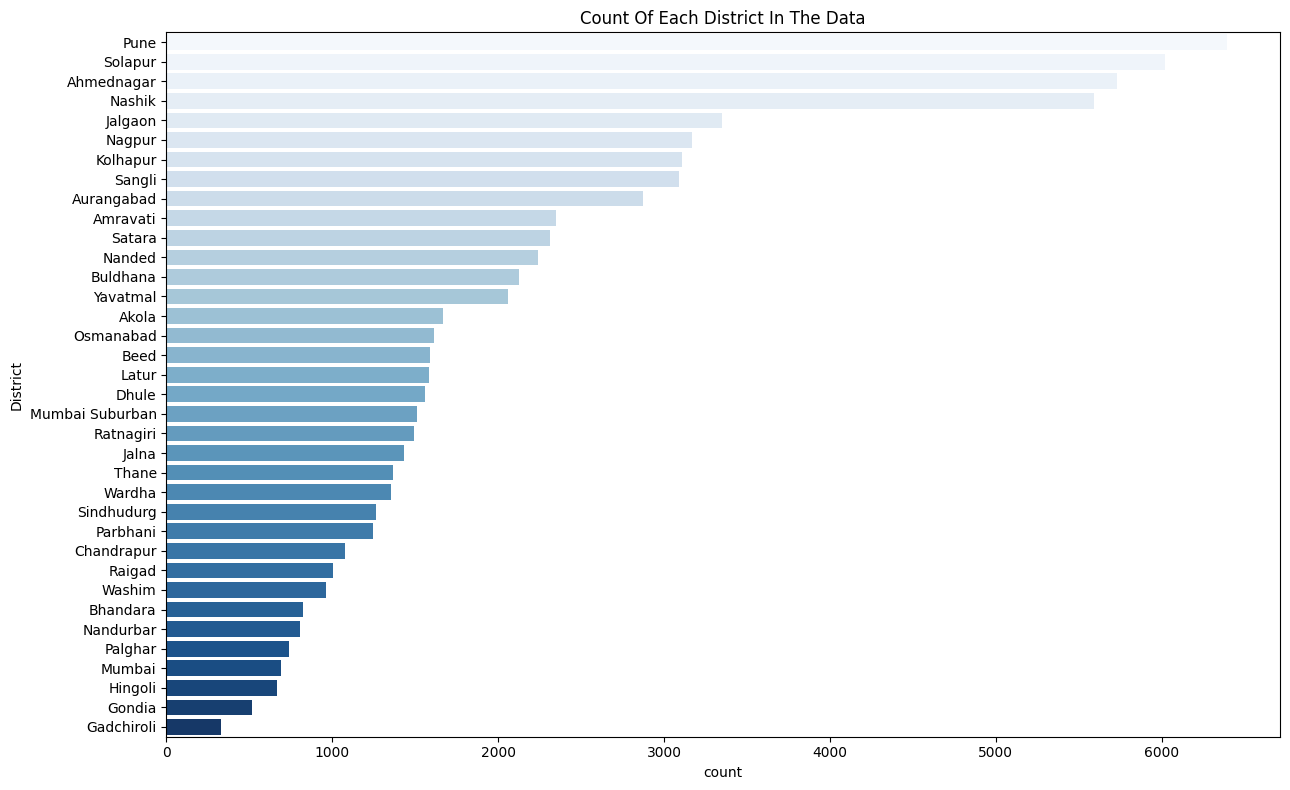

In [202]:
plt.figure(figsize=(13,8))
sns.barplot(y='District' , x= 'count', data=df_district,palette='Blues')
plt.title('Count Of Each District In The Data')
plt.tight_layout()
plt.show()

#### Observation:
1. Top 5 Districts with highest loan counts [Pune , Solapur, Ahmednagar, Nashik, Jalgaon]
2. Bottom 5 Districts with lowest loan counts [Palghar, Mumbai, Hingoli, Gondia, Gadchiroli]
3. Number of null values in District column 1786

### 2.Ticket Size Buckets	

In [15]:
ticket_df = df_data['Ticket Size Buckets'].value_counts().reset_index()

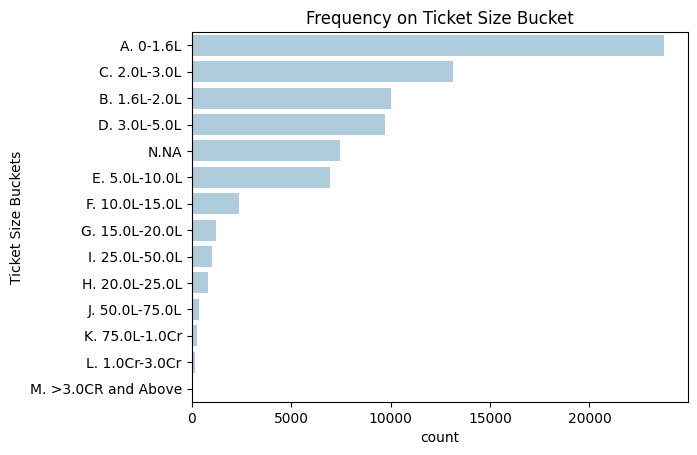

In [236]:
sns.barplot(y= 'Ticket Size Buckets', x='count', data=ticket_df)
plt.title('Frequency on Ticket Size Bucket')
plt.show()

In [17]:
round(df_data['Ticket Size Buckets'].value_counts()/df_data.shape[0]*100,2)

Ticket Size Buckets
A. 0-1.6L              30.64
C. 2.0L-3.0L           16.99
B. 1.6L-2.0L           12.93
D. 3.0L-5.0L           12.52
N.NA                    9.61
E. 5.0L-10.0L           8.97
F. 10.0L-15.0L          3.08
G. 15.0L-20.0L          1.61
I. 25.0L-50.0L          1.35
H. 20.0L-25.0L          1.08
J. 50.0L-75.0L          0.50
K. 75.0L-1.0Cr          0.39
L. 1.0Cr-3.0Cr          0.23
M. >3.0CR and Above     0.09
Name: count, dtype: float64

#### Observations:
1. Around 73% ticket size lies between 0-5 L
2. 30.64 % is between 1-1.6 L
3. less than 5 % ticket size lies between 20-30 and above
4. data has 9.61 % null 

### 3.DPD Bucket

In [18]:
dpd_df = df_data['DPD Bucket'].value_counts().reset_index()

Text(0.5, 1.0, 'Frequency of DPD Bucket')

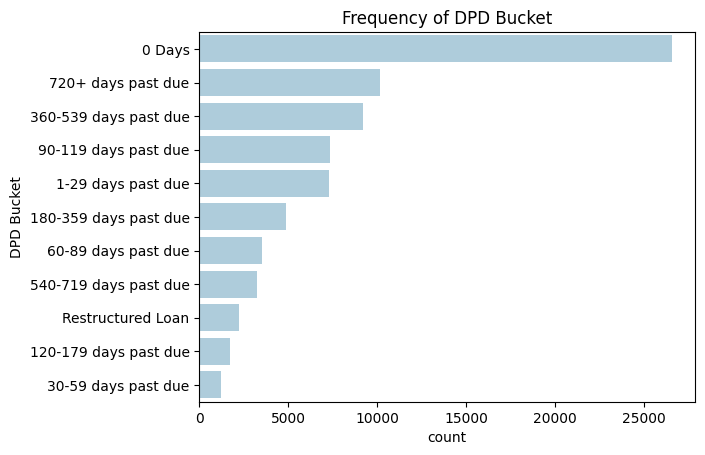

In [322]:
sns.barplot(y= 'DPD Bucket' , x= 'count', data=dpd_df)
plt.title('Frequency of DPD Bucket')

In [20]:
df_data['DPD Bucket'].isna().sum()

0

In [324]:
Percentage_of_dpd = round(df_data['DPD Bucket'].value_counts()/df_data.shape[0]*100,2)
Percentage_of_dpd

DPD Bucket
0 Days                   34.30
720+ days past due       13.10
360-539 days past due    11.90
90-119 days past due      9.52
1-29 days past due        9.43
180-359 days past due     6.31
60-89 days past due       4.54
540-719 days past due     4.19
Restructured Loan         2.89
120-179 days past due     2.27
30-59 days past due       1.54
Name: count, dtype: float64

#### Observations:
1. 34.30% of data have 0 days dpd bucket
2. 9.43 % of data have dpd 1-29 days
3. 2.90 % of data have Restructured Loan
4. There is no null values in the data

### 4.Financier

In [22]:
financ_df = df_data['Financier'].value_counts().reset_index()

In [23]:
round(df_data['Financier'].value_counts()/df_data.shape[0]*100,2)

Financier
PB     48.91
PT     39.82
ROI    11.27
Name: count, dtype: float64

<Axes: xlabel='Financier', ylabel='count'>

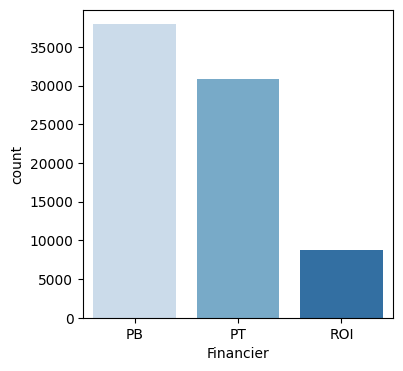

In [327]:
plt.figure(figsize=(4,4))
sns.barplot(x= 'Financier' , y = 'count', data=financ_df,palette='Blues')

#### Observations:
1. 48.91% of data  is Financier PB
2. 39.82% of data  is Financier PT
3. 11.27% of data  is Financier ROI
4. There is no null values in the column

### Distribution of data on numeric features.

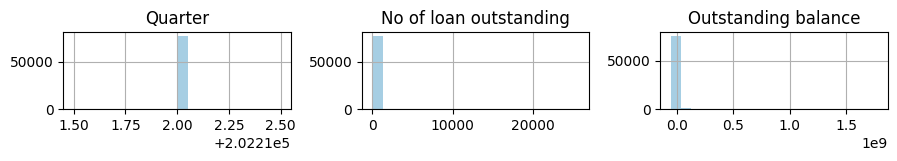

In [328]:
df_data.hist(bins=20, figsize=(24, 16), layout=(12, 8))

plt.tight_layout()
plt.show()

#### Observations:
1. The dataset's numeric columns exhibit non-normal distributions, suggesting potential skewness or heavy tails.
2. The 'No. of Loan Outstanding' column predominantly contains values close to zero, indicating a prevalence of entries with few or no outstanding loans.
3. 'Outstanding Balance' features numerous zero and negative values, potentially indicating paid-off loans.

### To ensure data completeness and accuracy imputing NULL values in District and Ticket Size Buckets columns

### Handling nulls in District Column
#### As the first three digit of pin code represents a distict code, we can use the district code to identify the district name from the existing pincodes which have the district information available. Once we have the district information available with the district code, we can use that to fill null districts for pincodes


In [27]:
len(df_data[['PIN_CODE', 'District']].drop_duplicates())

2046

In [28]:
df_pincodes_dist = df_data[['PIN_CODE', 'District']].drop_duplicates()

In [29]:
df_pincodes_dist[df_pincodes_dist['PIN_CODE'] == '403518']

PIN_CODE District
4265   403518      NaN

In [30]:
### extracting the district code from pincode which is first 3 digits of a pin code

In [31]:
df_pincodes_dist['dist_code'] = df_pincodes_dist['PIN_CODE'].str.slice(0, 3) 

In [32]:
df_pincodes_dist.head()

PIN_CODE District dist_code
0     400001   Mumbai       400
55    400002   Mumbai       400
81    400003   Mumbai       400
102   400004   Mumbai       400
127   400005   Mumbai       400

In [33]:
df_pincodes_dist[df_pincodes_dist['dist_code'] == '403']

PIN_CODE District dist_code
4265   403518      NaN       403

In [34]:
len(df_pincodes_dist)

2046

### Since there is a possibility that multiple pin codes can have the same district code. For example, In Pune, Wakad Pincode is 411057 and Balewadi Pincode is 411045. Hence, the district code is same i.e., 411. In such case, we can refer to our dataset and take the mode of the district available and assign that district to the null values. The code below calculates the mode of the district for a given district code

In [35]:
df_districts = df_pincodes_dist.groupby('dist_code')['District'].apply(lambda x: x.mode()).reset_index()[['dist_code', 'District']]

In [36]:
df_districts.head()

dist_code         District
0       400  Mumbai Suburban
1       401          Palghar
2       402           Raigad
3       410             Pune
4       411             Pune

In [37]:
df_district_new = df_pincodes_dist[['PIN_CODE', 'dist_code']].merge(df_districts, left_on='dist_code', right_on='dist_code', how='left')

In [38]:
df_district_new.rename(columns={'District': 'District_new'}, inplace=True)

#### There are 11 pincodes which only have 1 row per pincode, therefore mode cannot be calculated for these 11 pincodes. Hence replace the null for the 11 rows with the district mode

In [39]:
df_district_new['District_new'].fillna(df_district_new.District_new.mode()[0], inplace=True)

In [40]:
df_district_new.head()

PIN_CODE dist_code     District_new
0   400001       400  Mumbai Suburban
1   400002       400  Mumbai Suburban
2   400003       400  Mumbai Suburban
3   400004       400  Mumbai Suburban
4   400005       400  Mumbai Suburban

In [41]:
df_data_merged = df_data.merge(df_district_new, left_on = 'PIN_CODE', right_on = 'PIN_CODE', how='inner')

In [42]:
df_data_merged.head()

Quarter PIN_CODE        STATE District Ticket Size Buckets  \
0   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
1   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
2   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
3   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
4   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   

              DPD Bucket Financier  No of loan outstanding  \
0     1-29 days past due       ROI                       1   
1  120-179 days past due        PB                       1   
2  180-359 days past due       ROI                       1   
3    30-59 days past due        PT                       1   
4  360-539 days past due        PT                       1   

   Outstanding balance dist_code     District_new  
0               100000       400  Mumbai Suburban  
1               136515       400  Mumbai Suburban  
2                65396       400  Mumbai Suburban  
3                 6793       400  Mumbai Suburban  
4                46436       400  Mumbai Suburban

In [43]:
len(df_data)

77483

In [44]:
df_data_merged[df_data_merged['Ticket Size Buckets'] == 'N.NA'].head()

Quarter PIN_CODE        STATE District Ticket Size Buckets  \
49   202212   400001  Maharashtra   Mumbai                N.NA   
50   202212   400001  Maharashtra   Mumbai                N.NA   
51   202212   400001  Maharashtra   Mumbai                N.NA   
52   202212   400001  Maharashtra   Mumbai                N.NA   
53   202212   400001  Maharashtra   Mumbai                N.NA   

               DPD Bucket Financier  No of loan outstanding  \
49    30-59 days past due        PB                       1   
50    60-89 days past due        PB                       2   
51                 0 Days        PB                       3   
52                 0 Days       ROI                       5   
53  360-539 days past due        PB                       6   

    Outstanding balance dist_code     District_new  
49                -4344       400  Mumbai Suburban  
50                -7302       400  Mumbai Suburban  
51               243314       400  Mumbai Suburban  
52               175069       400  Mumbai Suburban  
53               669875       400  Mumbai Suburban

#### Replace null district with the new district column calculated above

In [45]:
df_data_merged['District'] = np.where(df_data_merged.District.isna(), df_data_merged.District_new, df_data_merged.District)

In [46]:
df_data_merged.drop(['District_new', 'dist_code'], axis=1, inplace=True)

In [47]:
df_data_merged.head()

Quarter PIN_CODE        STATE District Ticket Size Buckets  \
0   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
1   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
2   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
3   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
4   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   

              DPD Bucket Financier  No of loan outstanding  \
0     1-29 days past due       ROI                       1   
1  120-179 days past due        PB                       1   
2  180-359 days past due       ROI                       1   
3    30-59 days past due        PT                       1   
4  360-539 days past due        PT                       1   

   Outstanding balance  
0               100000  
1               136515  
2                65396  
3                 6793  
4                46436

In [48]:
len(df_data_merged)

77483

### Handling nulls in Ticket Size Buckets Column

#### Assuming that N.NA represents null value in Ticket Size Buckets column

In [49]:
df_data_merged['Ticket Size Buckets'].unique()

array(['A. 0-1.6L', 'B. 1.6L-2.0L', 'C. 2.0L-3.0L', 'D. 3.0L-5.0L',
       'E. 5.0L-10.0L', 'F. 10.0L-15.0L', 'L. 1.0Cr-3.0Cr', 'N.NA',
       'I. 25.0L-50.0L', 'J. 50.0L-75.0L', 'G. 15.0L-20.0L',
       'H. 20.0L-25.0L', 'K. 75.0L-1.0Cr', 'M. >3.0CR and Above'],
      dtype=object)

### First replace the N.NA with np.NAN so that it is considered as null

In [50]:
df_data_merged['Ticket Size Buckets'] = np.where(df_data_merged['Ticket Size Buckets'] == 'N.NA', np.NAN, df_data_merged['Ticket Size Buckets'])

In [51]:
df_data_merged.isna().sum()

Quarter                      0
PIN_CODE                     0
STATE                        0
District                     0
Ticket Size Buckets       7447
DPD Bucket                   0
Financier                    0
No of loan outstanding       0
Outstanding balance          0
dtype: int64

In [52]:
df_data_merged['Ticket Size Buckets'].unique()

array(['A. 0-1.6L', 'B. 1.6L-2.0L', 'C. 2.0L-3.0L', 'D. 3.0L-5.0L',
       'E. 5.0L-10.0L', 'F. 10.0L-15.0L', 'L. 1.0Cr-3.0Cr', nan,
       'I. 25.0L-50.0L', 'J. 50.0L-75.0L', 'G. 15.0L-20.0L',
       'H. 20.0L-25.0L', 'K. 75.0L-1.0Cr', 'M. >3.0CR and Above'],
      dtype=object)

In [53]:
df_data_merged.head(100)

Quarter PIN_CODE        STATE District Ticket Size Buckets  \
0    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
1    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
2    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
3    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
4    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
5    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
6    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
7    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
8    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
9    202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
10   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
11   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
12   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
13   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
14   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
15   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
16   202212   400001  Maharashtra   Mumbai        B. 1.6L-2.0L   
17   202212   400001  Maharashtra   Mumbai        B. 1.6L-2.0L   
18   202212   400001  Maharashtra   Mumbai        B. 1.6L-2.0L   
19   202212   400001  Maharashtra   Mumbai        B. 1.6L-2.0L   
20   202212   400001  Maharashtra   Mumbai        B. 1.6L-2.0L   
21   202212   400001  Maharashtra   Mumbai        B. 1.6L-2.0L   
22   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
23   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
24   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
25   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
26   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
27   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
28   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
29   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
30   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
31   202212   400001  Maharashtra   Mumbai        C. 2.0L-3.0L   
32   202212   400001  Maharashtra   Mumbai        D. 3.0L-5.0L   
33   202212   400001  Maharashtra   Mumbai        D. 3.0L-5.0L   
34   202212   400001  Maharashtra   Mumbai        D. 3.0L-5.0L   
35   202212   400001  Maharashtra   Mumbai        D. 3.0L-5.0L   
36   202212   400001  Maharashtra   Mumbai        D. 3.0L-5.0L   
37   202212   400001  Maharashtra   Mumbai        D. 3.0L-5.0L   
38   202212   400001  Maharashtra   Mumbai        D. 3.0L-5.0L   
39   202212   400001  Maharashtra   Mumbai        D. 3.0L-5.0L   
40   202212   400001  Maharashtra   Mumbai       E. 5.0L-10.0L   
41   202212   400001  Maharashtra   Mumbai       E. 5.0L-10.0L   
42   202212   400001  Maharashtra   Mumbai       E. 5.0L-10.0L   
43   202212   400001  Maharashtra   Mumbai       E. 5.0L-10.0L   
44   202212   400001  Maharashtra   Mumbai       E. 5.0L-10.0L   
45   202212   400001  Maharashtra   Mumbai      F. 10.0L-15.0L   
46   202212   400001  Maharashtra   Mumbai      F. 10.0L-15.0L   
47   202212   400001  Maharashtra   Mumbai      F. 10.0L-15.0L   
48   202212   400001  Maharashtra   Mumbai      L. 1.0Cr-3.0Cr   
49   202212   400001  Maharashtra   Mumbai                 NaN   
50   202212   400001  Maharashtra   Mumbai                 NaN   
51   202212   400001  Maharashtra   Mumbai                 NaN   
52   202212   400001  Maharashtra   Mumbai                 NaN   
53   202212   400001  Maharashtra   Mumbai                 NaN   
54   202212   400001  Maharashtra   Mumbai                 NaN   
55   202212   400002  Maharashtra   Mumbai           A. 0-1.6L   
56   202212   400002  Maharashtra   Mumbai           A. 0-1.6L   
57   202212   400002  Maharashtra   Mumbai           A. 0-1.6L   
58   202212   400002  Maharashtra   Mumbai           A. 0-1.6L   
59   202212   400002  Maharashtra   Mumbai  

In [54]:
df_data_merged[df_data_merged['Ticket Size Buckets'].isna()].head()

Quarter PIN_CODE        STATE District Ticket Size Buckets  \
49   202212   400001  Maharashtra   Mumbai                 NaN   
50   202212   400001  Maharashtra   Mumbai                 NaN   
51   202212   400001  Maharashtra   Mumbai                 NaN   
52   202212   400001  Maharashtra   Mumbai                 NaN   
53   202212   400001  Maharashtra   Mumbai                 NaN   

               DPD Bucket Financier  No of loan outstanding  \
49    30-59 days past due        PB                       1   
50    60-89 days past due        PB                       2   
51                 0 Days        PB                       3   
52                 0 Days       ROI                       5   
53  360-539 days past due        PB                       6   

    Outstanding balance  
49                -4344  
50                -7302  
51               243314  
52               175069  
53               669875

### Taking the mode of Ticket Size Buckets per pin code and assigning that bucket to the null values in Ticket Size bucket

In [55]:
df_pincode_tsb = df_data_merged.groupby('PIN_CODE')['Ticket Size Buckets'].apply(lambda x:x.mode()[0] if not x.mode().empty else None).reset_index()[['PIN_CODE', 'Ticket Size Buckets']]

In [56]:
df_pincode_tsb['Ticket Size Buckets'].fillna(df_pincode_tsb['Ticket Size Buckets'].mode()[0], inplace=True)

In [57]:
df_pincode_tsb.rename(columns={'Ticket Size Buckets': 'tsb_new'}, inplace=True)

In [58]:
df_pincode_tsb['tsb_new'].unique()

array(['A. 0-1.6L', 'C. 2.0L-3.0L', 'B. 1.6L-2.0L', 'I. 25.0L-50.0L',
       'E. 5.0L-10.0L', 'D. 3.0L-5.0L', 'F. 10.0L-15.0L',
       'G. 15.0L-20.0L'], dtype=object)

### Replacing the null value with the mode of the Ticket Size Buckets for that pin code

In [59]:
df_final = df_data_merged.merge(df_pincode_tsb, left_on = 'PIN_CODE', right_on = 'PIN_CODE', how='inner').drop_duplicates()

In [60]:
df_final['Ticket Size Buckets'] = np.where(df_final['Ticket Size Buckets'].isna() , df_final['tsb_new'], df_final['Ticket Size Buckets'])

In [61]:
len(df_final)

77483

In [62]:
df_final.isna().sum()

Quarter                   0
PIN_CODE                  0
STATE                     0
District                  0
Ticket Size Buckets       0
DPD Bucket                0
Financier                 0
No of loan outstanding    0
Outstanding balance       0
tsb_new                   0
dtype: int64

## Bi Variate Analysis

In [64]:
df_final.head()

Quarter PIN_CODE        STATE District Ticket Size Buckets  \
0   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
1   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
2   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
3   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   
4   202212   400001  Maharashtra   Mumbai           A. 0-1.6L   

              DPD Bucket Financier  No of loan outstanding  \
0     1-29 days past due       ROI                       1   
1  120-179 days past due        PB                       1   
2  180-359 days past due       ROI                       1   
3    30-59 days past due        PT                       1   
4  360-539 days past due        PT                       1   

   Outstanding balance    tsb_new  
0               100000  A. 0-1.6L  
1               136515  A. 0-1.6L  
2                65396  A. 0-1.6L  
3                 6793  A. 0-1.6L  
4                46436  A. 0-1.6L

#### Since Quarter and State column have only 1 value which does not contribute to the analysis hence dropping these columns

In [65]:
df_final.drop(['Quarter','STATE','tsb_new'],errors= 'ignore',axis=1, inplace=True)

In [66]:
df_final.head()

PIN_CODE District Ticket Size Buckets             DPD Bucket Financier  \
0   400001   Mumbai           A. 0-1.6L     1-29 days past due       ROI   
1   400001   Mumbai           A. 0-1.6L  120-179 days past due        PB   
2   400001   Mumbai           A. 0-1.6L  180-359 days past due       ROI   
3   400001   Mumbai           A. 0-1.6L    30-59 days past due        PT   
4   400001   Mumbai           A. 0-1.6L  360-539 days past due        PT   

   No of loan outstanding  Outstanding balance  
0                       1               100000  
1                       1               136515  
2                       1                65396  
3                       1                 6793  
4                       1                46436

### District and Outstanding balance Analysis

In [67]:
df_ob = round(df_final.groupby('District').sum()['Outstanding balance']/df_final['Outstanding balance'].sum()*100,2).sort_values(ascending=False).reset_index()


In [68]:
df_ob.head(10)

District  Outstanding balance
0     Solapur                 7.88
1      Nanded                 7.25
2        Beed                 6.45
3  Aurangabad                 5.94
4       Jalna                 5.75
5    Parbhani                 5.63
6      Nashik                 5.63
7    Buldhana                 5.09
8        Pune                 4.33
9   Osmanabad                 4.11

In [69]:
df_ob.rename(columns={'Outstanding balance': 'Percentage_ob'},inplace=True)

In [70]:
y1 = 'Percentage_ob'

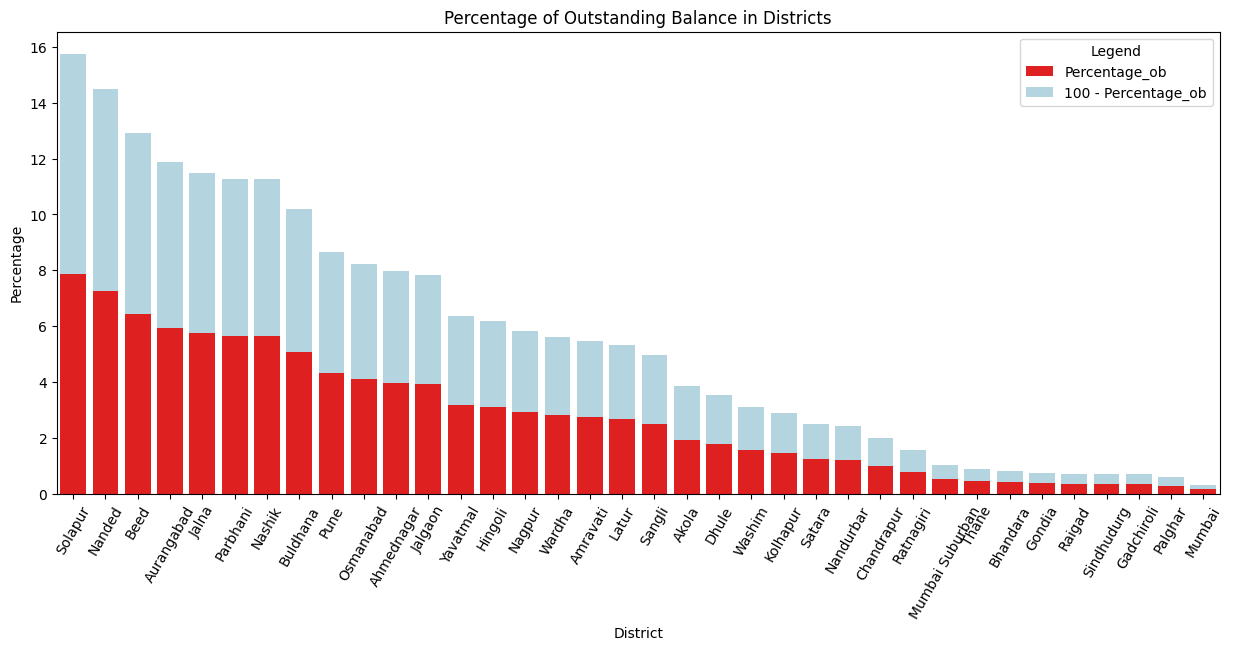

In [348]:
plt.figure(figsize=(15,6))
sns.barplot(x='District', y='Percentage_ob', color='red', label='Percentage_ob', data=df_ob)
sns.barplot(x='District', y='Percentage_ob', bottom=df_ob['Percentage_ob'], color='lightblue', label='100 - Percentage_ob', data=df_ob)

# Add labels and title
plt.xlabel('District')
plt.ylabel('Percentage')
plt.title('Percentage of Outstanding Balance in Districts')
plt.xticks(rotation=60)

# Show the legend
plt.legend(title='Legend')

# Display the plot
plt.show()

#### Observation 
##### Here we see the top 10 districts with maximum outstanding balance percentage :
#### Solapur , Nanded, Beed, Aurangabad, Jalna, Parbhani, Nashik, Buldhana, Pune, Osmanabad

### Ticket Size Buckets and Outstanding balance

In [72]:
df_obt= round(df_final.groupby('Ticket Size Buckets').sum()['Outstanding balance']/df_final['Outstanding balance'].sum()*100,2).reset_index()
df_obt.rename(columns={'Outstanding balance':'Percentage_obt'},inplace=True)

In [73]:
df_obt.head()

Ticket Size Buckets  Percentage_obt
0           A. 0-1.6L           62.62
1        B. 1.6L-2.0L            3.16
2        C. 2.0L-3.0L           11.00
3        D. 3.0L-5.0L            7.49
4       E. 5.0L-10.0L            6.74

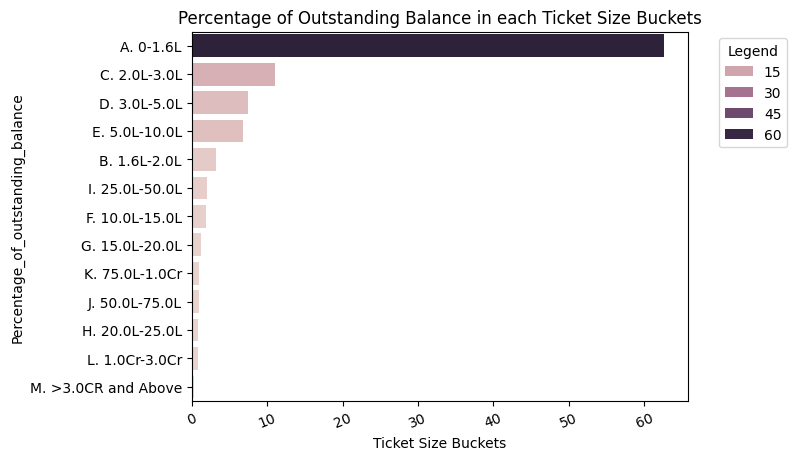

In [353]:
sns.barplot(y='Ticket Size Buckets', x='Percentage_obt', data=df_obt.sort_values(by='Percentage_obt', ascending=False), hue='Percentage_obt')
plt.xlabel('Ticket Size Buckets')
plt.ylabel('Percentage_of_outstanding_balance')
plt.title('Percentage of Outstanding Balance in each Ticket Size Buckets')
plt.xticks(rotation=22)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Observation
 The analysis reveals the distribution of outstanding balance across different ticket size buckets:

1. Ticket size bucket "A. 0-1.6L" dominates with a substantial 62.62% share of the outstanding balance, indicating its significant contribution to the      portfolio.
2. Following closely is the ticket size bucket "C. 2.0L-3.0L," representing 11% of the outstanding balance, suggesting a notable portion of the             portfolio's value.
3. Ticket size buckets "D. 3.0L-5.0L" and "E. 5.0L-10.0L" exhibit lower percentages of outstanding balance at 7.49% and 6.74%, respectively. Although
   less pronounced, they still contribute to the overall portfolio value.

### DPD Bucket and Outstanding balance

In [75]:
df_dpo= round(df_final.groupby('DPD Bucket').sum()['Outstanding balance']/df_final['Outstanding balance'].sum()*100,2).sort_values(ascending=False).reset_index()

In [76]:
df_dpo.rename(columns={'Outstanding balance' : 'Percentage_obd'},inplace=True)

Text(0.5, 1.0, 'Percentage by Outstanding Balance with DPD Bucket')

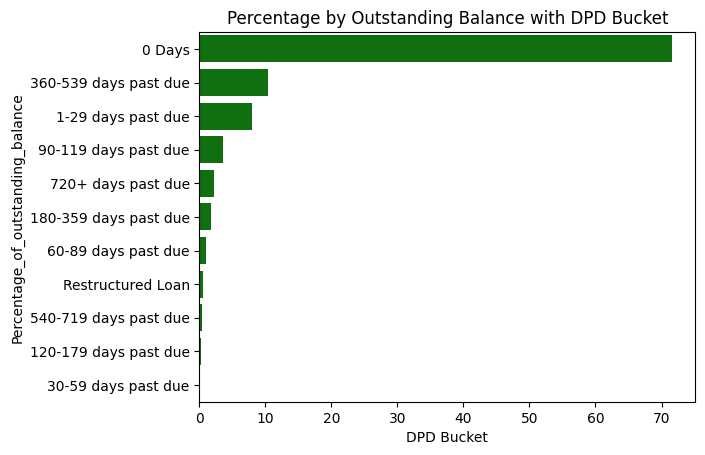

In [356]:
sns.barplot(y='DPD Bucket' ,x='Percentage_obd', data=df_dpo, color='green')
plt.xlabel('DPD Bucket')
plt.ylabel('Percentage_of_outstanding_balance')
plt.title('Percentage by Outstanding Balance with DPD Bucket')


### Oberservation:
1. Maximum Outstanding Balance for 0 Days DPD:
The data reveals that the highest outstanding balance is associated with the "0 days" DPD bucket, suggesting that a significant portion of loans is being paid promptly without any delays.

2. Potential Escalation of DPD Beyond 1-29 Days:
Upon examining the dataset, it's evident that once the DPD bucket exceeds the range of 1-29 days, there's a possibility for the data to escalate further, potentially reaching a span of up to 1 year.

### Financier v/s other variables

#### Financier and Outstanding balance

In [78]:
round(df_final.groupby('Financier').sum()['Outstanding balance']/df_final['Outstanding balance'].sum()*100,2)

Financier
PB     60.66
PT     19.90
ROI    19.45
Name: Outstanding balance, dtype: float64

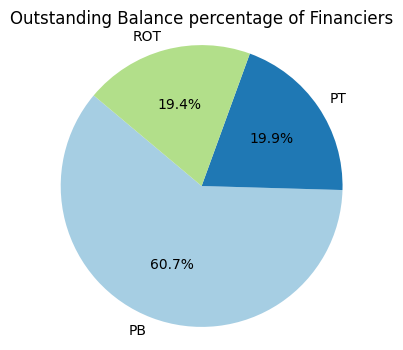

In [357]:
Outstanding_balance_percentages = [60.66, 19.90, 19.45]
Financier = ['PB', 'PT', 'ROT']


plt.figure(figsize=(4, 4))
plt.pie(Outstanding_balance_percentages, labels=Financier, autopct='%1.1f%%', startangle=140)
plt.title('Outstanding Balance percentage of Financiers')


plt.axis('equal')
plt.show()

### Observation:
#### PB Financier Dominates Outstanding Loan Portfolio
1. The analysis indicates that PB Financier holds the highest outstanding loan share at 60.7%.
2. Followed by PT and ROI financiers contributing 19.4% and 19.9%, respectively.

This highlights PB's dominant position in the portfolio, with PT and ROI also playing significant roles in financing. Understanding these distributions aids in assessing exposure and optimizing lending strategies for balanced portfolio management.


### Financier with [PIN_CODE, District, Outstanding balance,'No of loan outstanding']

In [358]:
df_fpdo = df_final.groupby(['Financier','PIN_CODE','District']).sum()[['Outstanding balance','No of loan outstanding']].reset_index().sort_values(by= 'Outstanding balance',ascending=False)

In [359]:
df_fpdo_outstanding = df_fpdo[df_fpdo['Financier']=='PB']

In [385]:
df_zero_ob= df_fpdo_outstanding[df_fpdo_outstanding['Outstanding balance']==0]

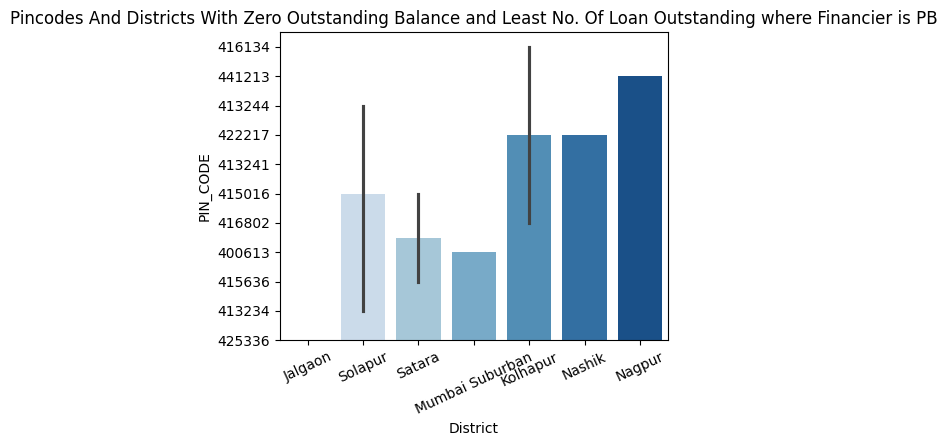

In [387]:
plt.figure(figsize=(5,4))
sns.barplot(y= 'PIN_CODE' , x='District', data=df_zero_ob, palette='Blues')
plt.xticks(rotation=25)
plt.title('Pincodes And Districts With Zero Outstanding Balance and Least No. Of Loan Outstanding where Financier is PB')
plt.gca().invert_yaxis()

In [84]:
df_fpdo_outstanding_pt = df_fpdo[df_fpdo['Financier']=='PT']

In [85]:
df_fopt = df_fpdo_outstanding_pt[df_fpdo_outstanding_pt['Outstanding balance']==0]

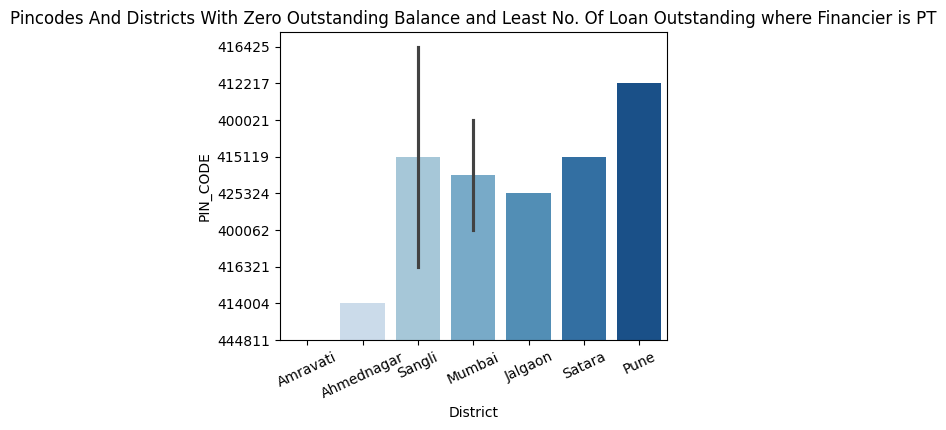

In [388]:
plt.figure(figsize=(5,4))
sns.barplot(y= 'PIN_CODE' , x='District', data=df_fopt, palette='Blues')
plt.xticks(rotation=25)
plt.title('Pincodes And Districts With Zero Outstanding Balance and Least No. Of Loan Outstanding where Financier is PT')
plt.gca().invert_yaxis()

In [87]:
df_fpdo_outstanding_pt = df_fpdo[df_fpdo['Financier']=='ROI']

In [88]:
df_fo_roi = df_fpdo_outstanding_pt[df_fpdo_outstanding_pt['Outstanding balance']==0]

In [89]:
df_fo_roi2= df_fo_roi.sort_values(by='PIN_CODE',ascending=False)

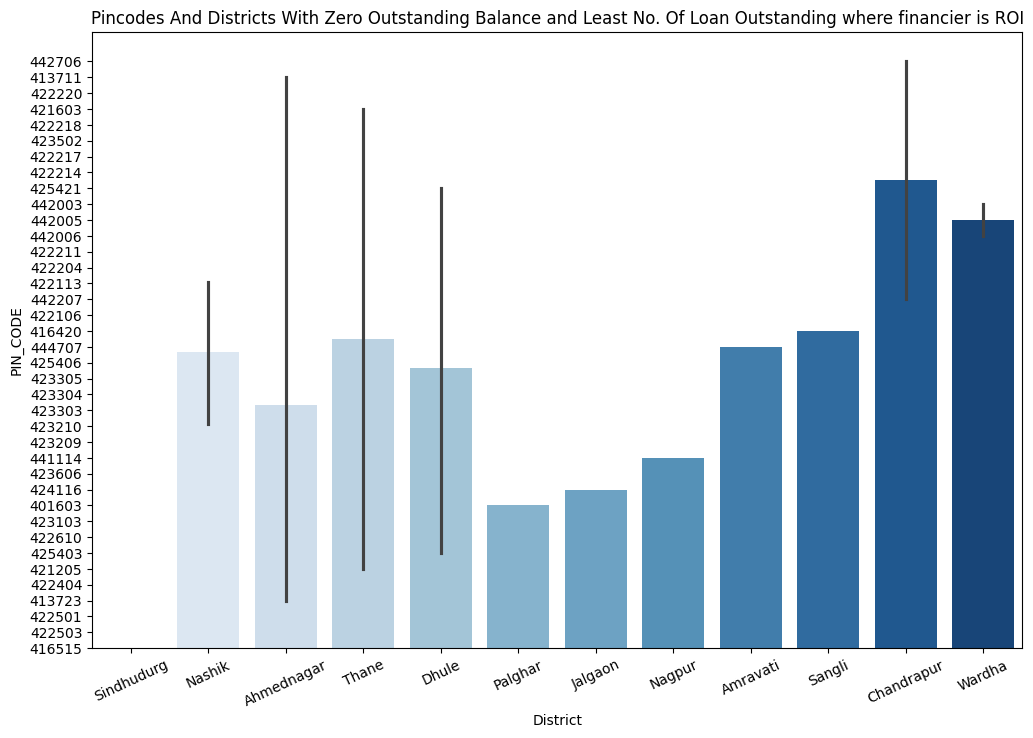

In [389]:
plt.figure(figsize=(12,8))
sns.barplot(y= 'PIN_CODE' , x='District', data=df_fo_roi, palette='Blues')
plt.xticks(rotation=25)
plt.title('Pincodes And Districts With Zero Outstanding Balance and Least No. Of Loan Outstanding where financier is ROI')
plt.gca().invert_yaxis()

#### Identifying Top Performers: PB's Dominance in High Outstanding Balances
1. In this analysis, PB emerges as the leading financier across regions such as:
   Nanded, Nasik, Beed, Solapur, Buldhana, and Parbhani, showcasing substantial outstanding balances. 
2. Conversely, the dataset highlights noteworthy pincodes like 425336, 413234, 415636, 400613, 416802, 415016, 413241, 422217, 413244, 441213, 416134,      416225, and 425122, where outstanding balances register at zero.

#### Financier and Ticket Size Buckets

In [91]:
df_Financier = df_final.groupby(['Financier','Ticket Size Buckets'])['PIN_CODE'].count().reset_index()

In [92]:
df_Financier.columns

Index(['Financier', 'Ticket Size Buckets', 'PIN_CODE'], dtype='object')

In [93]:
df_Financier.rename(columns={'PIN_CODE' :'pin_count'},inplace=True)

In [94]:
pb_df = df_Financier[df_Financier['Financier']=='PB']

In [95]:
pb_df['percent']= round(pb_df['pin_count']/pb_df['pin_count'].sum()*100,2)

In [96]:
pb_df = pb_df.sort_values(by='percent', ascending=False)

In [97]:
pb_df

Financier  Ticket Size Buckets  pin_count  percent
0         PB            A. 0-1.6L      18577    49.02
2         PB         C. 2.0L-3.0L       6358    16.78
1         PB         B. 1.6L-2.0L       5029    13.27
3         PB         D. 3.0L-5.0L       3839    10.13
4         PB        E. 5.0L-10.0L       2593     6.84
5         PB       F. 10.0L-15.0L        747     1.97
6         PB       G. 15.0L-20.0L        341     0.90
7         PB       H. 20.0L-25.0L        181     0.48
8         PB       I. 25.0L-50.0L        180     0.47
9         PB       J. 50.0L-75.0L         28     0.07
10        PB       K. 75.0L-1.0Cr         12     0.03
11        PB       L. 1.0Cr-3.0Cr          7     0.02
12        PB  M. >3.0CR and Above          3     0.01

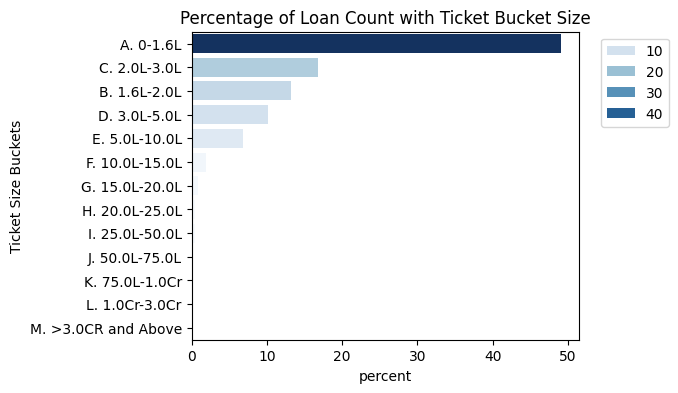

In [98]:
plt.figure(figsize=(5,4))
sns.barplot(x='percent', y='Ticket Size Buckets', data=pb_df,hue='percent', palette='Blues')
plt.title('Percentage of Loan Count with Ticket Bucket Size')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))
plt.show()

### Observations:
1. Total number of loans provided by PBFinancier is 31908 which is 41.12%
2. 40.07% of loan provided to Ticket Size Buckets (A. 0-1.6L)
3. 87.25% of loan count ranges from A. 0-1.6L to D. 3.0L-5.0L
4. So,looking at the data we can say majority of the loan provided by PBFinancier ranges upto 5Lakhs 

In [99]:
df_Financier[df_Financier['Financier']=='PT']
pt_df = df_Financier[df_Financier['Financier']=='PT']
pt_df['percent']= round(pt_df['pin_count']/pt_df['pin_count'].sum()*100,2)
pt_df=pt_df.sort_values(by='percent', ascending=False)
pt_df

Financier  Ticket Size Buckets  pin_count  percent
13        PT            A. 0-1.6L       7027    22.77
15        PT         C. 2.0L-3.0L       5528    17.91
16        PT         D. 3.0L-5.0L       5284    17.12
17        PT        E. 5.0L-10.0L       4142    13.42
14        PT         B. 1.6L-2.0L       4041    13.10
18        PT       F. 10.0L-15.0L       1625     5.27
19        PT       G. 15.0L-20.0L        896     2.90
21        PT       I. 25.0L-50.0L        849     2.75
20        PT       H. 20.0L-25.0L        645     2.09
22        PT       J. 50.0L-75.0L        357     1.16
23        PT       K. 75.0L-1.0Cr        280     0.91
24        PT       L. 1.0Cr-3.0Cr        163     0.53
25        PT  M. >3.0CR and Above         20     0.06

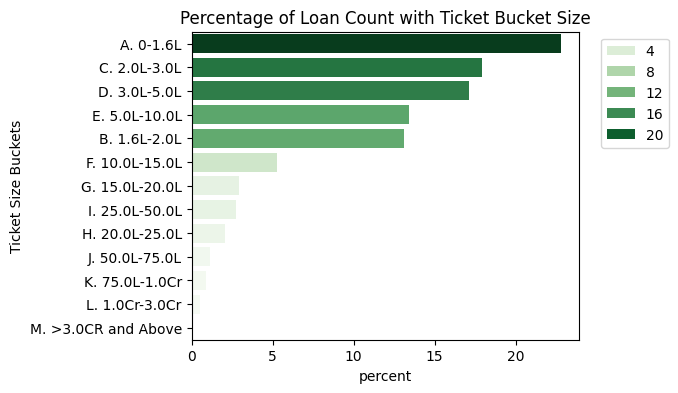

In [100]:
plt.figure(figsize=(5,4))
sns.barplot(x='percent', y='Ticket Size Buckets', data=pt_df,hue='percent', palette='Greens')
plt.title('Percentage of Loan Count with Ticket Bucket Size')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))
plt.show()

### Observations:
 1. Total number of loans provided by PTFinancier is 39.82%.
 2. 22.77% of loans lies under Ticket Bucket Size A. 0-1.6L.
 3. 70.91% of loans lies between 0-5L.
 


lowest performing pincode, highest, major outstanding balance, on higher loans as well, district level

In [101]:
df_Financier[df_Financier['Financier']=='ROI']
roi_df = df_Financier[df_Financier['Financier']=='ROI']
roi_df['percent']= round(roi_df['pin_count']/roi_df['pin_count'].sum()*100,2)
roi_df= roi_df.sort_values(by='percent', ascending=False)
roi_df

Financier  Ticket Size Buckets  pin_count  percent
26       ROI            A. 0-1.6L       5344    61.21
28       ROI         C. 2.0L-3.0L       1455    16.66
27       ROI         B. 1.6L-2.0L        962    11.02
29       ROI         D. 3.0L-5.0L        609     6.98
30       ROI        E. 5.0L-10.0L        236     2.70
38       ROI  M. >3.0CR and Above         50     0.57
31       ROI       F. 10.0L-15.0L         18     0.21
34       ROI       I. 25.0L-50.0L         15     0.17
33       ROI       H. 20.0L-25.0L         11     0.13
32       ROI       G. 15.0L-20.0L         10     0.11
37       ROI       L. 1.0Cr-3.0Cr          8     0.09
36       ROI       K. 75.0L-1.0Cr          7     0.08
35       ROI       J. 50.0L-75.0L          6     0.07

In [102]:
df_final['Financier'].unique()

array(['ROI', 'PB', 'PT'], dtype=object)

In [103]:
roi_df['pin_count'].sum()/len(df_final['Financier'])

0.11268278202960649

In [104]:
roi_df['pin_count'].sum()/df_final['Financier'].count()*100

11.26827820296065

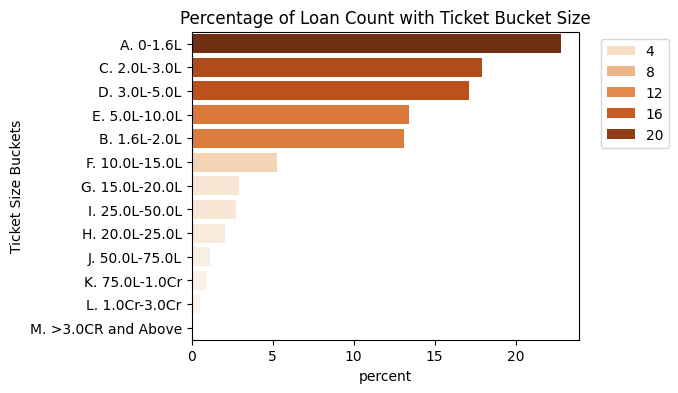

In [105]:
plt.figure(figsize=(5,4))

sns.barplot(x='percent', y='Ticket Size Buckets', data=pt_df,hue='percent', palette='Oranges')
plt.title('Percentage of Loan Count with Ticket Bucket Size')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))

plt.show()

### Observations:
 1. 54.04% of loans lies under Ticket Bucket Size A. 0-1.6L. 
 2. 95.06% of loans lies between 0-5L. 
 

### Financier with DPD Bucket	

In [106]:
df_pin_count= df_final.groupby(['Financier', 'DPD Bucket']).count()['PIN_CODE'].reset_index()


In [107]:
df_pin = df_pin_count[df_pin_count['Financier']=='PB']
df_pin['percent'] = round(df_pin['PIN_CODE']/ df_pin['PIN_CODE'].sum()*100,2)
df_pin.rename(columns={'PIN_CODE':'pin_count'},inplace=True)
df_pin.sort_values(by='percent', ascending=False,inplace=True)

In [108]:
df_pin

Financier             DPD Bucket  pin_count  percent
0         PB                 0 Days      11391    30.06
5         PB  360-539 days past due       6153    16.24
1         PB     1-29 days past due       4816    12.71
8         PB     720+ days past due       4756    12.55
9         PB   90-119 days past due       4654    12.28
10        PB      Restructured Loan       1963     5.18
3         PB  180-359 days past due       1147     3.03
7         PB    60-89 days past due        962     2.54
2         PB  120-179 days past due        891     2.35
6         PB  540-719 days past due        707     1.87
4         PB    30-59 days past due        455     1.20

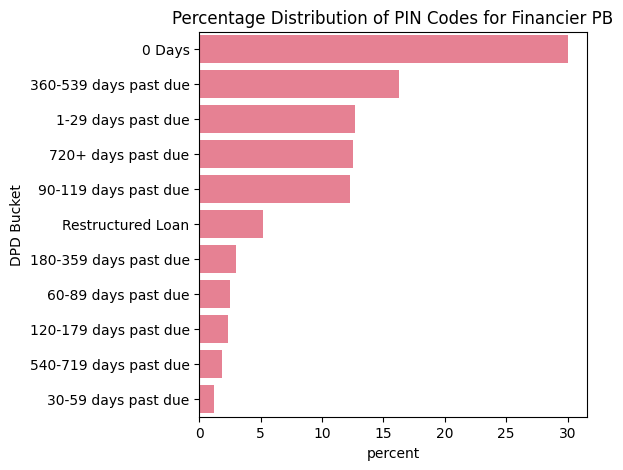

In [109]:
plt.figure(figsize=(5,5))
sns.set_palette("husl")
sns.barplot(y= 'DPD Bucket' , x='percent', data=df_pin)
plt.title('Percentage Distribution of PIN Codes for Financier PB')
plt.show()

In [110]:
df_pin2 = df_pin_count[df_pin_count['Financier']=='PT']
df_pin2['percent'] = round(df_pin2['PIN_CODE']/ df_pin2['PIN_CODE'].sum()*100,2)
df_pin2.rename(columns={'PIN_CODE':'pin_count'},inplace=True)
df_pin2.sort_values(by='percent', ascending=False,inplace=True)

In [111]:
df_pin2

Financier             DPD Bucket  pin_count  percent
11        PT                 0 Days      10289    33.34
19        PT     720+ days past due       4701    15.23
14        PT  180-359 days past due       3516    11.39
17        PT  540-719 days past due       2504     8.11
18        PT    60-89 days past due       2423     7.85
16        PT  360-539 days past due       2155     6.98
20        PT   90-119 days past due       1766     5.72
12        PT     1-29 days past due       1763     5.71
13        PT  120-179 days past due        756     2.45
15        PT    30-59 days past due        704     2.28
21        PT      Restructured Loan        280     0.91

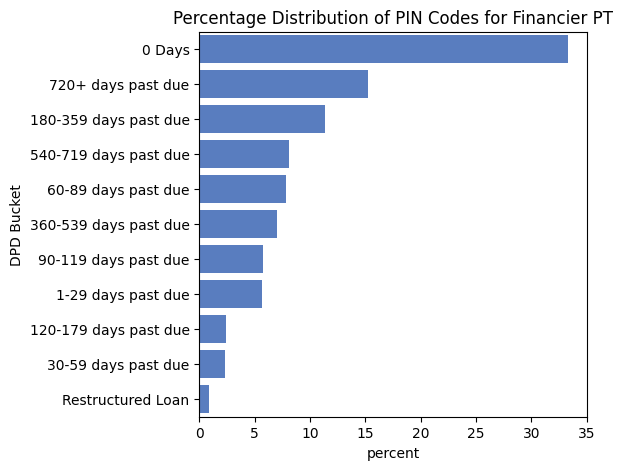

In [112]:
plt.figure(figsize=(5,5))
sns.set_palette("muted")
sns.barplot(y= 'DPD Bucket' , x='percent', data=df_pin2)
plt.title('Percentage Distribution of PIN Codes for Financier PT')
plt.show()

In [113]:
df_pin3 = df_pin_count[df_pin_count['Financier']=='ROI']
df_pin3['percent'] = round(df_pin3['PIN_CODE']/ df_pin3['PIN_CODE'].sum()*100,2)
df_pin3.rename(columns={'PIN_CODE':'pin_count'},inplace=True)
df_pin3.sort_values(by='percent', ascending=False,inplace=True)

In [114]:
df_pin3

Financier             DPD Bucket  pin_count  percent
22       ROI                 0 Days       4896    56.08
31       ROI   90-119 days past due        956    10.95
27       ROI  360-539 days past due        913    10.46
23       ROI     1-29 days past due        729     8.35
30       ROI     720+ days past due        695     7.96
25       ROI  180-359 days past due        229     2.62
29       ROI    60-89 days past due        129     1.48
24       ROI  120-179 days past due        109     1.25
28       ROI  540-719 days past due         39     0.45
26       ROI    30-59 days past due         36     0.41

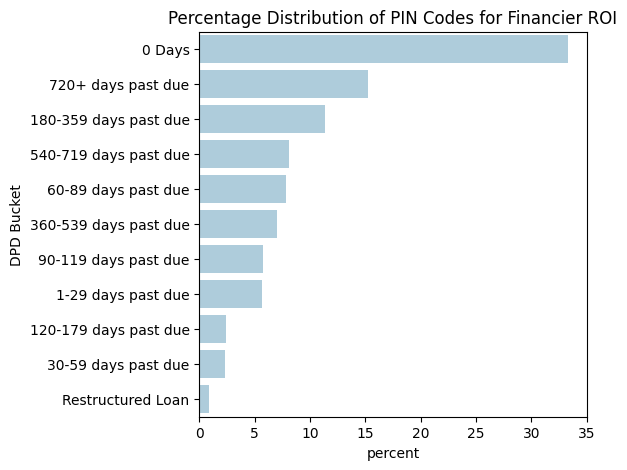

In [115]:
plt.figure(figsize=(5,5))
sns.set_palette("Paired")
sns.barplot(y= 'DPD Bucket' , x='percent', data=df_pin2)
plt.title('Percentage Distribution of PIN Codes for Financier ROI')
plt.show()

### Observations:
##### Financier PB:
1. Looking at the data we see that Financier PB has 30.06% of pincodes with 0 days DPD Bucket.
2. 16.24% of pincodes ranges from 360-539 days past due.
3. 12.55% of pincodes are exceeding 720+ days past due.
##### Financier PT:
1. Looking at the data we see that Financier PB has 33.34% of pincodes with 0 days DPD Bucket.
2. 6.98% of pincodes ranges from 360-539 days past due.
3. 15.23% of pincodes are exceeding 720+ days past due.
##### Financier ROI:
1. Looking at the data we see that Financier PB has 56.08% of pincodes with 0 days DPD Bucket.
2. 10.95% of pincodes ranges from 90-119 days past due
3. 7.96% of pincodes ranges from 360-539 days past due.
4. 8.35% of pincodes are exceeding 720+ days past due.

### DPD Bucket and Ticket Size Bucket and other variables

In [116]:
 dpd = df_final.groupby('DPD Bucket').count()['Ticket Size Buckets'].reset_index()

In [117]:
 dpd2 = df_final.groupby('Ticket Size Buckets').count()['DPD Bucket'].reset_index()

In [118]:
dpd2

Ticket Size Buckets  DPD Bucket
0             A. 0-1.6L       30948
1          B. 1.6L-2.0L       10032
2          C. 2.0L-3.0L       13341
3          D. 3.0L-5.0L        9732
4         E. 5.0L-10.0L        6971
5        F. 10.0L-15.0L        2390
6        G. 15.0L-20.0L        1247
7        H. 20.0L-25.0L         837
8        I. 25.0L-50.0L        1044
9        J. 50.0L-75.0L         391
10       K. 75.0L-1.0Cr         299
11       L. 1.0Cr-3.0Cr         178
12  M. >3.0CR and Above          73

#### Here i am checking the percent of outstanding balance and no. of loan outstanding with respect to each dpd bucket and ticket size buckets

In [119]:
 dpd2 = df_final.groupby(['Ticket Size Buckets','DPD Bucket']).sum()[['Outstanding balance', 'No of loan outstanding']].reset_index()

##### Ticket Size Buckets - A. 0-1.6L	

In [120]:
df_ticket = dpd2[dpd2['Ticket Size Buckets']== 'A. 0-1.6L']
df_ticket['percent_ob']=round(df_ticket['Outstanding balance']/df_ticket['Outstanding balance'].sum()*100,2)
df_ticket['percent_nlo']=round(df_ticket['No of loan outstanding']/df_ticket['No of loan outstanding'].sum()*100,2)
df_ticket

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
0            A. 0-1.6L                 0 Days         163656102200   
1            A. 0-1.6L     1-29 days past due          20707327136   
2            A. 0-1.6L  120-179 days past due            305543062   
3            A. 0-1.6L  180-359 days past due            950551323   
4            A. 0-1.6L    30-59 days past due            132349511   
5            A. 0-1.6L  360-539 days past due          26721882357   
6            A. 0-1.6L  540-719 days past due          -1070928801   
7            A. 0-1.6L    60-89 days past due            393179360   
8            A. 0-1.6L     720+ days past due           -405728983   
9            A. 0-1.6L   90-119 days past due           9257327539   
10           A. 0-1.6L      Restructured Loan            689632166   

    No of loan outstanding  percent_ob  percent_nlo  
0                  2055085       73.94        73.29  
1                   221271        9.36         7.89  
2                     5319        0.14         0.19  
3                    14997        0.43         0.53  
4                     1572        0.06         0.06  
5                   269626       12.07         9.62  
6                    13584       -0.48         0.48  
7                     5241        0.18         0.19  
8                   112564       -0.18         4.01  
9                    92378        4.18         3.29  
10                   12478        0.31         0.44

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size 79.43 in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (540-719 days past due) of -0.73%
3. Average outstanding percentage for this bucket is 9.09%


##### Ticket Size Buckets - B. 1.6L-2.0L

In [121]:
df_ticket2 = dpd2[dpd2['Ticket Size Buckets']== 'B. 1.6L-2.0L']
df_ticket2['percent_ob']=round(df_ticket2['Outstanding balance']/df_ticket2['Outstanding balance'].sum()*100,2)
df_ticket2['percent_nlo']=round(df_ticket2['No of loan outstanding']/df_ticket2['No of loan outstanding'].sum()*100,2)
df_ticket2

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
11        B. 1.6L-2.0L                 0 Days           6952830093   
12        B. 1.6L-2.0L     1-29 days past due            883276518   
13        B. 1.6L-2.0L  120-179 days past due             56346006   
14        B. 1.6L-2.0L  180-359 days past due            291262533   
15        B. 1.6L-2.0L    30-59 days past due             27999101   
16        B. 1.6L-2.0L  360-539 days past due           1275527679   
17        B. 1.6L-2.0L  540-719 days past due            189583204   
18        B. 1.6L-2.0L    60-89 days past due            156858392   
19        B. 1.6L-2.0L     720+ days past due            898469539   
20        B. 1.6L-2.0L   90-119 days past due            374843122   
21        B. 1.6L-2.0L      Restructured Loan             71029610   

    No of loan outstanding  percent_ob  percent_nlo  
11                   45795       62.20        62.10  
12                    4722        7.90         6.40  
13                     307        0.50         0.42  
14                    1681        2.61         2.28  
15                     170        0.25         0.23  
16                    8572       11.41        11.62  
17                    1182        1.70         1.60  
18                     917        1.40         1.24  
19                    7888        8.04        10.70  
20                    2134        3.35         2.89  
21                     381        0.64         0.52

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 62.19% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (30-59 days past due) of 0.25%
3. Average outstanding percentage for this bucket is 9.09%


##### Ticket Size Buckets - C. 2.0L-3.0L

In [122]:
df_ticket3 = dpd2[dpd2['Ticket Size Buckets']== 'C. 2.0L-3.0L']
df_ticket3['percent_ob']=round(df_ticket3['Outstanding balance']/df_ticket3['Outstanding balance'].sum()*100,2)
df_ticket3['percent_nlo']=round(df_ticket3['No of loan outstanding']/df_ticket3['No of loan outstanding'].sum()*100,2)
df_ticket3

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
22        C. 2.0L-3.0L                 0 Days          25492448531   
23        C. 2.0L-3.0L     1-29 days past due           3039455184   
24        C. 2.0L-3.0L  120-179 days past due            124088353   
25        C. 2.0L-3.0L  180-359 days past due           1123677006   
26        C. 2.0L-3.0L    30-59 days past due             57647640   
27        C. 2.0L-3.0L  360-539 days past due           3931664999   
28        C. 2.0L-3.0L  540-719 days past due            532462830   
29        C. 2.0L-3.0L    60-89 days past due            551719931   
30        C. 2.0L-3.0L     720+ days past due           2357601842   
31        C. 2.0L-3.0L   90-119 days past due           1370034513   
32        C. 2.0L-3.0L      Restructured Loan            284383954   

    No of loan outstanding  percent_ob  percent_nlo  
22                  116237       65.59        66.01  
23                   10993        7.82         6.24  
24                     477        0.32         0.27  
25                    4329        2.89         2.46  
26                     259        0.15         0.15  
27                   17558       10.12         9.97  
28                    2136        1.37         1.21  
29                    2242        1.42         1.27  
30                   15634        6.07         8.88  
31                    5243        3.53         2.98  
32                     983        0.73         0.56

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 65.6% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (30-59 days past due) of 0.15%



##### Ticket Size Buckets - D. 3.0L-5.0L

In [123]:
df_ticket4 = dpd2[dpd2['Ticket Size Buckets']== 'D. 3.0L-5.0L']
df_ticket4['percent_ob']=round(df_ticket4['Outstanding balance']/df_ticket4['Outstanding balance'].sum()*100,2)
df_ticket4['percent_nlo']=round(df_ticket4['No of loan outstanding']/df_ticket4['No of loan outstanding'].sum()*100,2)
df_ticket4

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
33        D. 3.0L-5.0L                 0 Days          15840426162   
34        D. 3.0L-5.0L     1-29 days past due           1429119622   
35        D. 3.0L-5.0L  120-179 days past due             69355258   
36        D. 3.0L-5.0L  180-359 days past due           1665781854   
37        D. 3.0L-5.0L    30-59 days past due             67834350   
38        D. 3.0L-5.0L  360-539 days past due           1904700765   
39        D. 3.0L-5.0L  540-719 days past due            872319361   
40        D. 3.0L-5.0L    60-89 days past due            863598018   
41        D. 3.0L-5.0L     720+ days past due           2646145661   
42        D. 3.0L-5.0L   90-119 days past due            738927393   
43        D. 3.0L-5.0L      Restructured Loan            379635573   

    No of loan outstanding  percent_ob  percent_nlo  
33                   49124       59.83        62.88  
34                    3566        5.40         4.56  
35                     202        0.26         0.26  
36                    4168        6.29         5.34  
37                     202        0.26         0.26  
38                    5936        7.19         7.60  
39                    2084        3.29         2.67  
40                    2230        3.26         2.85  
41                    7862        9.99        10.06  
42                    1940        2.79         2.48  
43                     808        1.43         1.03

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 59.85% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (30-59 days past due) of 0.26%



##### Ticket Size Buckets - E. 5.0L-10.0L

In [124]:
df_ticket5 = dpd2[dpd2['Ticket Size Buckets']== 'E. 5.0L-10.0L']
df_ticket5['percent_ob']=round(df_ticket5['Outstanding balance']/df_ticket5['Outstanding balance'].sum()*100,2)
df_ticket5['percent_nlo']=round(df_ticket5['No of loan outstanding']/df_ticket5['No of loan outstanding'].sum()*100,2)
df_ticket5

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
44       E. 5.0L-10.0L                 0 Days          15095792129   
45       E. 5.0L-10.0L     1-29 days past due           1244889454   
46       E. 5.0L-10.0L  120-179 days past due             59142439   
47       E. 5.0L-10.0L  180-359 days past due           1518543245   
48       E. 5.0L-10.0L    30-59 days past due             60501377   
49       E. 5.0L-10.0L  360-539 days past due           1678972339   
50       E. 5.0L-10.0L  540-719 days past due            615437132   
51       E. 5.0L-10.0L    60-89 days past due            859520027   
52       E. 5.0L-10.0L     720+ days past due           1744548041   
53       E. 5.0L-10.0L   90-119 days past due            685595182   
54       E. 5.0L-10.0L      Restructured Loan            275371329   

    No of loan outstanding  percent_ob  percent_nlo  
44                   27722       63.33        67.34  
45                    1778        5.22         4.32  
46                     111        0.25         0.27  
47                    2203        6.37         5.35  
48                     104        0.25         0.25  
49                    2762        7.04         6.71  
50                     875        2.58         2.13  
51                    1292        3.61         3.14  
52                    2973        7.32         7.22  
53                    1020        2.88         2.48  
54                     325        1.16         0.79

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 63.36% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (30-59 days past due) of 0.25%



##### Ticket Size Buckets - F. 10.0L-15.0L

In [125]:
df_ticket6 = dpd2[dpd2['Ticket Size Buckets']== 'F. 10.0L-15.0L']
df_ticket6['percent_ob']=round(df_ticket6['Outstanding balance']/df_ticket6['Outstanding balance'].sum()*100,2)
df_ticket6['percent_nlo']=round(df_ticket6['No of loan outstanding']/df_ticket6['No of loan outstanding'].sum()*100,2)
df_ticket6

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
55      F. 10.0L-15.0L                 0 Days           4743841306   
56      F. 10.0L-15.0L     1-29 days past due            287358821   
57      F. 10.0L-15.0L  120-179 days past due             29471615   
58      F. 10.0L-15.0L  180-359 days past due            302110292   
59      F. 10.0L-15.0L    30-59 days past due             22557080   
60      F. 10.0L-15.0L  360-539 days past due            348706031   
61      F. 10.0L-15.0L  540-719 days past due             95788330   
62      F. 10.0L-15.0L    60-89 days past due            229771462   
63      F. 10.0L-15.0L     720+ days past due            408288024   
64      F. 10.0L-15.0L   90-119 days past due            154503297   
65      F. 10.0L-15.0L      Restructured Loan             91960861   

    No of loan outstanding  percent_ob  percent_nlo  
55                    4981       70.65        74.07  
56                     248        4.28         3.69  
57                      31        0.44         0.46  
58                     254        4.50         3.78  
59                      23        0.34         0.34  
60                     312        5.19         4.64  
61                      86        1.43         1.28  
62                     183        3.42         2.72  
63                     418        6.08         6.22  
64                     131        2.30         1.95  
65                      58        1.37         0.86

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 70.65% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (30-59 days past due) of 0.34%



##### Ticket Size Buckets - G. 15.0L-20.0L

In [126]:
df_ticket7 = dpd2[dpd2['Ticket Size Buckets']== 'G. 15.0L-20.0L']
df_ticket7['percent_ob']=round(df_ticket7['Outstanding balance']/df_ticket7['Outstanding balance'].sum()*100,2)
df_ticket7['percent_nlo']=round(df_ticket7['No of loan outstanding']/df_ticket7['No of loan outstanding'].sum()*100,2)
df_ticket7

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
66      G. 15.0L-20.0L                 0 Days           3367926815   
67      G. 15.0L-20.0L     1-29 days past due            144871248   
68      G. 15.0L-20.0L  120-179 days past due              5669212   
69      G. 15.0L-20.0L  180-359 days past due            108894812   
70      G. 15.0L-20.0L    30-59 days past due             18297114   
71      G. 15.0L-20.0L  360-539 days past due            181066869   
72      G. 15.0L-20.0L  540-719 days past due             24693895   
73      G. 15.0L-20.0L    60-89 days past due            168000807   
74      G. 15.0L-20.0L     720+ days past due             86572170   
75      G. 15.0L-20.0L   90-119 days past due             95023829   
76      G. 15.0L-20.0L      Restructured Loan             44172512   

    No of loan outstanding  percent_ob  percent_nlo  
66                    2435       79.34        81.30  
67                      86        3.41         2.87  
68                       5        0.13         0.17  
69                      71        2.57         2.37  
70                      12        0.43         0.40  
71                     109        4.27         3.64  
72                      15        0.58         0.50  
73                      92        3.96         3.07  
74                      94        2.04         3.14  
75                      52        2.24         1.74  
76                      24        1.04         0.80

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 79.34% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (120-179 days past due) of 0.13%



##### Ticket Size Buckets - H. 20.0L-25.0L

In [127]:
df_ticket8 = dpd2[dpd2['Ticket Size Buckets']== 'H. 20.0L-25.0L']
df_ticket8['percent_ob']=round(df_ticket8['Outstanding balance']/df_ticket8['Outstanding balance'].sum()*100,2)
df_ticket8['percent_nlo']=round(df_ticket8['No of loan outstanding']/df_ticket8['No of loan outstanding'].sum()*100,2)
df_ticket8

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
77      H. 20.0L-25.0L                 0 Days           2370625831   
78      H. 20.0L-25.0L     1-29 days past due            105348625   
79      H. 20.0L-25.0L  120-179 days past due             14269483   
80      H. 20.0L-25.0L  180-359 days past due             67018866   
81      H. 20.0L-25.0L    30-59 days past due             11496783   
82      H. 20.0L-25.0L  360-539 days past due            123799685   
83      H. 20.0L-25.0L  540-719 days past due             10202520   
84      H. 20.0L-25.0L    60-89 days past due            132518848   
85      H. 20.0L-25.0L     720+ days past due             57319609   
86      H. 20.0L-25.0L   90-119 days past due             24761720   
87      H. 20.0L-25.0L      Restructured Loan             33426972   

    No of loan outstanding  percent_ob  percent_nlo  
77                    1334       80.34        82.91  
78                      47        3.57         2.92  
79                       6        0.48         0.37  
80                      33        2.27         2.05  
81                       6        0.39         0.37  
82                      51        4.20         3.17  
83                       4        0.35         0.25  
84                      56        4.49         3.48  
85                      46        1.94         2.86  
86                      13        0.84         0.81  
87                      13        1.13         0.81

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 79.34% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (540-719 days past due) of 0.35%



##### Ticket Size Buckets - I. 25.0L-50.0L

In [128]:
df_ticket9 = dpd2[dpd2['Ticket Size Buckets']== 'I. 25.0L-50.0L']
df_ticket9['percent_ob']=round(df_ticket9['Outstanding balance']/df_ticket9['Outstanding balance'].sum()*100,2)
df_ticket9['percent_nlo']=round(df_ticket9['No of loan outstanding']/df_ticket9['No of loan outstanding'].sum()*100,2)
df_ticket9

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
88      I. 25.0L-50.0L                 0 Days           6085367433   
89      I. 25.0L-50.0L     1-29 days past due            228472228   
90      I. 25.0L-50.0L  120-179 days past due             20109922   
91      I. 25.0L-50.0L  180-359 days past due            197853084   
92      I. 25.0L-50.0L    30-59 days past due             24557421   
93      I. 25.0L-50.0L  360-539 days past due            180249251   
94      I. 25.0L-50.0L  540-719 days past due             27082325   
95      I. 25.0L-50.0L    60-89 days past due            284328485   
96      I. 25.0L-50.0L     720+ days past due             88640774   
97      I. 25.0L-50.0L   90-119 days past due             85223777   
98      I. 25.0L-50.0L      Restructured Loan             41317140   

    No of loan outstanding  percent_ob  percent_nlo  
88                    2312       83.78        86.04  
89                      66        3.15         2.46  
90                       6        0.28         0.22  
91                      65        2.72         2.42  
92                       9        0.34         0.33  
93                      70        2.48         2.61  
94                       7        0.37         0.26  
95                      79        3.91         2.94  
96                      39        1.22         1.45  
97                      20        1.17         0.74  
98                      14        0.57         0.52

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 83.78% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (120-179 days past due) of 0.28%



##### Ticket Size Buckets - J. 50.0L-75.0L

In [129]:
df_ticket10 = dpd2[dpd2['Ticket Size Buckets']== 'J. 50.0L-75.0L']
df_ticket10['percent_ob']=round(df_ticket10['Outstanding balance']/df_ticket10['Outstanding balance'].sum()*100,2)
df_ticket10['percent_nlo']=round(df_ticket10['No of loan outstanding']/df_ticket10['No of loan outstanding'].sum()*100,2)
df_ticket10

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
99       J. 50.0L-75.0L                 0 Days           2821818765   
100      J. 50.0L-75.0L     1-29 days past due             47558175   
101      J. 50.0L-75.0L  120-179 days past due             16120691   
102      J. 50.0L-75.0L  180-359 days past due             59676426   
103      J. 50.0L-75.0L    30-59 days past due             22496823   
104      J. 50.0L-75.0L  360-539 days past due             68964737   
105      J. 50.0L-75.0L  540-719 days past due             12539354   
106      J. 50.0L-75.0L    60-89 days past due             63948283   
107      J. 50.0L-75.0L     720+ days past due            107279996   
108      J. 50.0L-75.0L   90-119 days past due             15708528   
109      J. 50.0L-75.0L      Restructured Loan             11379564   

     No of loan outstanding  percent_ob  percent_nlo  
99                      623       86.89        88.62  
100                      10        1.46         1.42  
101                       4        0.50         0.57  
102                      13        1.84         1.85  
103                       4        0.69         0.57  
104                      14        2.12         1.99  
105                       2        0.39         0.28  
106                      11        1.97         1.56  
107                      14        3.30         1.99  
108                       6        0.48         0.85  
109                       2        0.35         0.28

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 86.89% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (Restructured Loan) of 0.35%



##### Ticket Size Buckets - K. 75.0L-1.0Cr

In [130]:
df_ticket11 = dpd2[dpd2['Ticket Size Buckets']== 'K. 75.0L-1.0Cr']
df_ticket11['percent_ob']=round(df_ticket11['Outstanding balance']/df_ticket11['Outstanding balance'].sum()*100,2)
df_ticket11['percent_nlo']=round(df_ticket11['No of loan outstanding']/df_ticket11['No of loan outstanding'].sum()*100,2)
df_ticket11

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
110      K. 75.0L-1.0Cr                 0 Days           3186987974   
111      K. 75.0L-1.0Cr     1-29 days past due             66471864   
112      K. 75.0L-1.0Cr  180-359 days past due             28389885   
113      K. 75.0L-1.0Cr    30-59 days past due             10139367   
114      K. 75.0L-1.0Cr  360-539 days past due             29003572   
115      K. 75.0L-1.0Cr  540-719 days past due             25371090   
116      K. 75.0L-1.0Cr    60-89 days past due             71218210   
117      K. 75.0L-1.0Cr     720+ days past due                    0   
118      K. 75.0L-1.0Cr   90-119 days past due             16615062   

     No of loan outstanding  percent_ob  percent_nlo  
110                     519       92.80        92.68  
111                       9        1.94         1.61  
112                       8        0.83         1.43  
113                       1        0.30         0.18  
114                       8        0.84         1.43  
115                       4        0.74         0.71  
116                       8        2.07         1.43  
117                       1        0.00         0.18  
118                       2        0.48         0.36

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 92.8% in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (720+ days past due) of 0%



##### Ticket Size Buckets - L. 1.0Cr-3.0Cr

In [131]:
df_ticket12 = dpd2[dpd2['Ticket Size Buckets']== 'L. 1.0Cr-3.0Cr']
df_ticket12['percent_ob']=round(df_ticket12['Outstanding balance']/df_ticket12['Outstanding balance'].sum()*100,2)
df_ticket12['percent_nlo']=round(df_ticket12['No of loan outstanding']/df_ticket12['No of loan outstanding'].sum()*100,2)
df_ticket12

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
119      L. 1.0Cr-3.0Cr                 0 Days           2542467959   
120      L. 1.0Cr-3.0Cr     1-29 days past due            151092914   
121      L. 1.0Cr-3.0Cr  120-179 days past due             34566616   
122      L. 1.0Cr-3.0Cr  180-359 days past due             41368506   
123      L. 1.0Cr-3.0Cr  360-539 days past due             51745834   
124      L. 1.0Cr-3.0Cr    60-89 days past due             14892503   
125      L. 1.0Cr-3.0Cr     720+ days past due             32980630   
126      L. 1.0Cr-3.0Cr   90-119 days past due             16095622   
127      L. 1.0Cr-3.0Cr      Restructured Loan              3936639   

     No of loan outstanding  percent_ob  percent_nlo  
119                     222       88.00        85.06  
120                      12        5.23         4.60  
121                       2        1.20         0.77  
122                       5        1.43         1.92  
123                      12        1.79         4.60  
124                       1        0.52         0.38  
125                       4        1.14         1.53  
126                       2        0.56         0.77  
127                       1        0.14         0.38

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 88 % in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (Restructured Loan) of 0.14 %


##### Ticket Size Buckets - M. >3.0CR and Above

In [132]:
df_ticket13 = dpd2[dpd2['Ticket Size Buckets']== 'M. >3.0CR and Above']
df_ticket13['percent_ob']=round(df_ticket13['Outstanding balance']/df_ticket13['Outstanding balance'].sum()*100,2)
df_ticket13['percent_nlo']=round(df_ticket13['No of loan outstanding']/df_ticket13['No of loan outstanding'].sum()*100,2)
df_ticket13

Ticket Size Buckets             DPD Bucket  Outstanding balance  \
128  M. >3.0CR and Above                 0 Days            751086629   
129  M. >3.0CR and Above     1-29 days past due             71484606   
130  M. >3.0CR and Above  120-179 days past due               114856   
131  M. >3.0CR and Above  180-359 days past due              1005116   
132  M. >3.0CR and Above    30-59 days past due             35625699   
133  M. >3.0CR and Above  360-539 days past due            136815545   
134  M. >3.0CR and Above   90-119 days past due               142828   

     No of loan outstanding  percent_ob  percent_nlo  
128                      50       75.39        52.08  
129                       2        7.18         2.08  
130                       3        0.01         3.12  
131                      20        0.10        20.83  
132                       2        3.58         2.08  
133                      11       13.73        11.46  
134                       8        0.01         8.33

### Observations:
1. Here looking at the data we can say highest percentage of outstanding loan in this ticket size is 75.39 % in 0 Days DPD bucket.
2. Lowest percentage of outstanding loan is in (120-179 days past due) of 0.01 %



#### Splitting the data into independent variable(X) and dependent variable(y)

In [133]:
df_final.head()

PIN_CODE District Ticket Size Buckets             DPD Bucket Financier  \
0   400001   Mumbai           A. 0-1.6L     1-29 days past due       ROI   
1   400001   Mumbai           A. 0-1.6L  120-179 days past due        PB   
2   400001   Mumbai           A. 0-1.6L  180-359 days past due       ROI   
3   400001   Mumbai           A. 0-1.6L    30-59 days past due        PT   
4   400001   Mumbai           A. 0-1.6L  360-539 days past due        PT   

   No of loan outstanding  Outstanding balance  
0                       1               100000  
1                       1               136515  
2                       1                65396  
3                       1                 6793  
4                       1                46436

In [134]:
X = df_final.drop(['Outstanding balance'],axis=1)
y= df_final['Outstanding balance']

In [135]:
X.head()

PIN_CODE District Ticket Size Buckets             DPD Bucket Financier  \
0   400001   Mumbai           A. 0-1.6L     1-29 days past due       ROI   
1   400001   Mumbai           A. 0-1.6L  120-179 days past due        PB   
2   400001   Mumbai           A. 0-1.6L  180-359 days past due       ROI   
3   400001   Mumbai           A. 0-1.6L    30-59 days past due        PT   
4   400001   Mumbai           A. 0-1.6L  360-539 days past due        PT   

   No of loan outstanding  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1

### Correlation Between Categorical and Numerical Features

#### Annova Hypothesis Test

Null hypothesis(H0): The variables are not correlated with each other
P-value: The probability of Null hypothesis being true
Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
Reject Null hypothesis if P-value<0.05. Means variables are correlated

In [136]:
from scipy.stats import f_oneway

In [137]:
level_of_significance = 0.05
for num_col in ['Outstanding balance', 'No of loan outstanding']:
    for col in df_final.columns:
        print('*************************************************')
        print(f'Applying Anova for column {col} with {num_col}')
        CategoryGroupLists =df_final.groupby(col)[num_col].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        print('P-Value for Anova is: ', AnovaResults[1])
        if AnovaResults[1] < level_of_significance:
            print(f'There is a relationship between {num_col} and {col}')
        else:
            print(f'There is no relationship between {num_col} and {col}')
    

*************************************************
Applying Anova for column PIN_CODE with Outstanding balance
P-Value for Anova is:  1.610774452920889e-34
There is a relationship between Outstanding balance and PIN_CODE
*************************************************
Applying Anova for column District with Outstanding balance
P-Value for Anova is:  7.10150163363356e-310
There is a relationship between Outstanding balance and District
*************************************************
Applying Anova for column Ticket Size Buckets with Outstanding balance
P-Value for Anova is:  4.4653864219295223e-159
There is a relationship between Outstanding balance and Ticket Size Buckets
*************************************************
Applying Anova for column DPD Bucket with Outstanding balance
P-Value for Anova is:  0.0
There is a relationship between Outstanding balance and DPD Bucket
*************************************************
Applying Anova for column Financier with Outstanding balance

### Observation:
1. Based on Anova test we can see that all the categorical variables are correlated to number of loan outstanding and outstanding balance

### Chi Square Test

In [138]:
from scipy.stats import chi2_contingency 

In [139]:
cat_cols = set(list(df_final.columns)) - set(['PIN_CODE', 'No of loan outstanding', 'Outstanding balance'])

In [140]:
def pair_iteration(lst):
    pairs = [(e1, e2) for e1, e2 in zip(lst, lst[1:]+[lst[0]])]
    return pairs
final_cols = pair_iteration(list(cat_cols))

In [141]:
level_of_significance = 0.05
for cat in final_cols:
    print('****************************************************')
    print(f'Applying Anova for column {cat[0]} with {cat[1]}')
    contingency = pd.crosstab(df_final[cat[0]], df_final[cat[1]])
    p_value = chi2_contingency(contingency)[1]
    print("p value: " + str(p_value)) 
    if p_value < level_of_significance:
        print(f'There is a relationship between {cat[0]} and {cat[1]}')
    else:
        print(f'There is no relationship between {cat[0]} and {cat[1]}')  

****************************************************
Applying Anova for column Ticket Size Buckets with District
p value: 0.0
There is a relationship between Ticket Size Buckets and District
****************************************************
Applying Anova for column District with DPD Bucket
p value: 0.0
There is a relationship between District and DPD Bucket
****************************************************
Applying Anova for column DPD Bucket with Financier
p value: 0.0
There is a relationship between DPD Bucket and Financier
****************************************************
Applying Anova for column Financier with Ticket Size Buckets
p value: 0.0
There is a relationship between Financier and Ticket Size Buckets


### Observation:
1. Based on Chi-square test we can see that all the categorical variables are related to each other

In [142]:
df_final.head()

PIN_CODE District Ticket Size Buckets             DPD Bucket Financier  \
0   400001   Mumbai           A. 0-1.6L     1-29 days past due       ROI   
1   400001   Mumbai           A. 0-1.6L  120-179 days past due        PB   
2   400001   Mumbai           A. 0-1.6L  180-359 days past due       ROI   
3   400001   Mumbai           A. 0-1.6L    30-59 days past due        PT   
4   400001   Mumbai           A. 0-1.6L  360-539 days past due        PT   

   No of loan outstanding  Outstanding balance  
0                       1               100000  
1                       1               136515  
2                       1                65396  
3                       1                 6793  
4                       1                46436

In [144]:
filtered_df_u6m = df_final[df_final['DPD Bucket'].isin(['0 Days', '1-29 days past due', '30-59 days past due', '60-89 days past due'])]

# Group by 'PIN_CODE' and 'DPD Bucket' and count
grouped_df_u6m = filtered_df_u6m.groupby(['PIN_CODE', 'DPD Bucket']).size().reset_index(name='count')

In [145]:
top_performing_pincodes= list(grouped_df_u6m['PIN_CODE'].unique())

In [146]:
len(top_performing_pincodes)

2011

In [147]:
filtered_df_o1y = df_final[df_final['DPD Bucket'].isin(['360-539 days past due', '540-719 days past due', '720+ days past due'])]

# Group by 'PIN_CODE' and 'DPD Bucket' and count
grouped_df_o1y = filtered_df_o1y.groupby(['PIN_CODE', 'DPD Bucket']).size().reset_index(name='count')

In [148]:
excluded_zero_df = df_final[df_final['DPD Bucket']!='0 Days']

In [149]:
excluded_zero_df.head()

PIN_CODE District Ticket Size Buckets             DPD Bucket Financier  \
0   400001   Mumbai           A. 0-1.6L     1-29 days past due       ROI   
1   400001   Mumbai           A. 0-1.6L  120-179 days past due        PB   
2   400001   Mumbai           A. 0-1.6L  180-359 days past due       ROI   
3   400001   Mumbai           A. 0-1.6L    30-59 days past due        PT   
4   400001   Mumbai           A. 0-1.6L  360-539 days past due        PT   

   No of loan outstanding  Outstanding balance  
0                       1               100000  
1                       1               136515  
2                       1                65396  
3                       1                 6793  
4                       1                46436

In [150]:
filtered_df= excluded_zero_df[excluded_zero_df['DPD Bucket'].isin(['1-29 days past due', '30-59 days past due'])]

grouped_df= filtered_df.groupby(['PIN_CODE', 'DPD Bucket','Ticket Size Buckets']).size().reset_index(name='count')

In [151]:
bs_list = list(grouped_df['PIN_CODE'].unique())

In [152]:
new_df = pd.DataFrame(bs_list,columns=['PIN_CODE'])

In [153]:
len(new_df)

1683

In [154]:
best_pin = excluded_zero_df[excluded_zero_df['PIN_CODE'].isin(new_df['PIN_CODE'])]

In [155]:
top_10_pin= best_pin.groupby(['PIN_CODE','District','Financier']).sum()[['Outstanding balance','No of loan outstanding']].reset_index().sort_values(by='Outstanding balance',ascending=True).head(10)

### Top 10 Pin_code with least Outstanding balance
##### These are the top 10 best performing pincode where dpd bucket ranges from 1-59 days and outstanding balance is least

In [164]:
top_10_pin.drop(['count'],axis=1)

PIN_CODE         District Financier  Outstanding balance  \
132    400073  Mumbai Suburban        PT            -14132135   
2674   431201       Aurangabad        PT             -4930143   
304    401701          Palghar        PT             -3503174   
1898   416610       Sindhudurg        PT             -2688654   
2089   422206           Nashik        PT             -2631147   
2467   425415        Nandurbar        PT             -2197907   
301    401607          Palghar        PT             -1933256   
2719   431502            Jalna        PT             -1794805   
148    400079  Mumbai Suburban        PT             -1730914   
383    410209           Raigad        PT             -1344125   

      No of loan outstanding  
132                        4  
2674                      96  
304                        1  
1898                       2  
2089                      20  
2467                      23  
301                        1  
2719                      47  
148                        2  
383                        1

In [165]:
top_10_pin['percent']= round(top_10_pin['Outstanding balance']/top_10_pin['Outstanding balance'].sum()*100,2)

In [170]:
top_10_pin_sorted = top_10_pin.sort_values(by='percent', ascending=False)

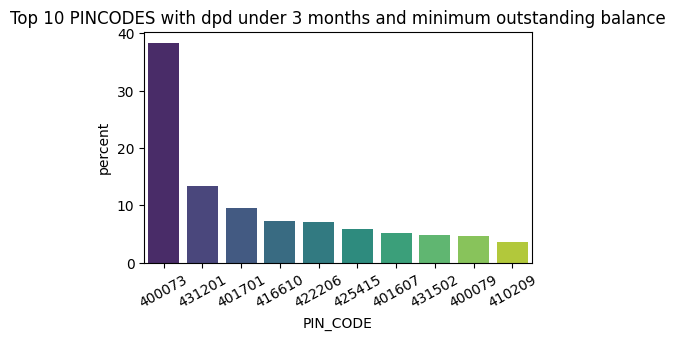

In [173]:
plt.figure(figsize=(5,3))

sns.barplot(x= 'PIN_CODE', y='percent', data=top_10_pin_sorted, palette='viridis')
plt.title('Top 10 PINCODES with dpd under 3 months and minimum outstanding balance')
plt.xticks(rotation=29)
plt.show()


### Bottom 10 Pin_code with least Outstanding balance
##### These are the bottom 10  pincode where dpd bucket ranges from 360 to 720+ days and outstanding balance is maximum

In [181]:
filtered_df_wrst= excluded_zero_df[excluded_zero_df['DPD Bucket'].isin(['360-539 days past due', '540-719 days past due', '720+ days past due'])]
grouped_df_wrst= filtered_df_wrst.groupby(['PIN_CODE', 'DPD Bucket','Ticket Size Buckets']).size().reset_index(name='count')
ws_list = list(grouped_df_wrst['PIN_CODE'].unique())
new_ws_df = pd.DataFrame(ws_list,columns=['PIN_CODE'])

In [182]:
worst_pin = excluded_zero_df[excluded_zero_df['PIN_CODE'].isin(new_ws_df['PIN_CODE'])]

In [188]:
bottom_10_pin= worst_pin.groupby(['PIN_CODE','District','Financier']).sum()[['Outstanding balance','No of loan outstanding']].reset_index().sort_values(by='Outstanding balance',ascending=True).tail(10)

In [189]:
bottom_10_pin['percent']= round(bottom_10_pin['Outstanding balance']/bottom_10_pin['Outstanding balance'].sum()*100,2)

In [191]:
bt_df= bottom_10_pin.sort_values(by='percent',ascending=True)

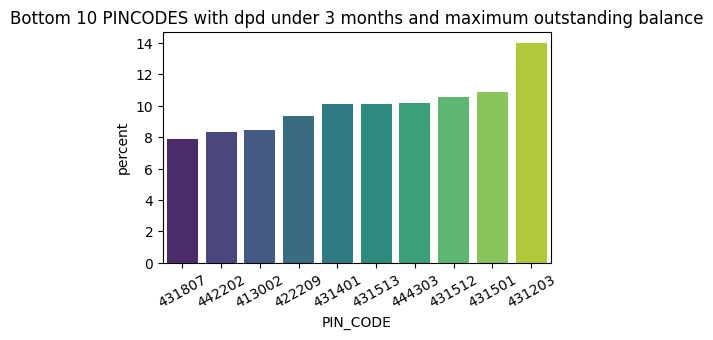

In [390]:
plt.figure(figsize=(5,3))

sns.barplot(x= 'PIN_CODE', y='percent', data=bt_df, palette='viridis')
plt.title('Bottom 10 PINCODES with dpd under 3 months and maximum outstanding balance')
plt.xticks(rotation=29)
plt.show()


### Best Pincode with Ticket Size bucket where outstanding balance 

In [395]:
filtered_df= excluded_zero_df[excluded_zero_df['DPD Bucket'].isin(['1-29 days past due', '30-59 days past due'])]

In [396]:
filtered_df.head()

PIN_CODE District Ticket Size Buckets           DPD Bucket Financier  \
0    400001   Mumbai           A. 0-1.6L   1-29 days past due       ROI   
3    400001   Mumbai           A. 0-1.6L  30-59 days past due        PT   
13   400001   Mumbai           A. 0-1.6L   1-29 days past due        PB   
29   400001   Mumbai        C. 2.0L-3.0L   1-29 days past due        PB   
37   400001   Mumbai        D. 3.0L-5.0L   1-29 days past due        PB   

    No of loan outstanding  Outstanding balance  
0                        1               100000  
3                        1                 6793  
13                      21              1518815  
29                       6              1506085  
37                      19              7738000

In [406]:
best_ticket_outs = filtered_df.groupby(['Ticket Size Buckets','PIN_CODE']).sum()['Outstanding balance'].reset_index()

In [413]:
best_ticket_outs['Ticket Size Buckets'].value_counts()

Ticket Size Buckets
A. 0-1.6L              1629
C. 2.0L-3.0L           1089
B. 1.6L-2.0L            828
D. 3.0L-5.0L            777
E. 5.0L-10.0L           552
F. 10.0L-15.0L          149
G. 15.0L-20.0L           74
I. 25.0L-50.0L           60
H. 20.0L-25.0L           41
J. 50.0L-75.0L           12
L. 1.0Cr-3.0Cr           11
K. 75.0L-1.0Cr           10
M. >3.0CR and Above       3
Name: count, dtype: int64

##### Here we can say that from 1.0Cr to >3.0CR outstanding balance is least

#### In outstanding balance we have multiple values which are negatives and 0 considering them as outliers and removing them

In [ ]:
sns.boxplot(data=df_ft, x="Outstanding balance")


In [278]:
df_ft_final = df_ft[df_ft['Outstanding balance'] > 0]

In [284]:
df_ft_final.groupby('Ticket Size Buckets').count()

District  DPD Bucket  Financier  No of loan outstanding  \
Ticket Size Buckets                                                            
A. 0-1.6L               25931       25931      25931                   25931   
B. 1.6L-2.0L             9302        9302       9302                    9302   
C. 2.0L-3.0L            12417       12417      12417                   12417   
D. 3.0L-5.0L             9138        9138       9138                    9138   
E. 5.0L-10.0L            6570        6570       6570                    6570   
F. 10.0L-15.0L           2262        2262       2262                    2262   
G. 15.0L-20.0L           1187        1187       1187                    1187   
H. 20.0L-25.0L            805         805        805                     805   
I. 25.0L-50.0L           1006        1006       1006                    1006   
J. 50.0L-75.0L            385         385        385                     385   
K. 75.0L-1.0Cr            282         282        282                     282   
L. 1.0Cr-3.0Cr            170         170        170                     170   
M. >3.0CR and Above        72          72         72                      72   

                     Outstanding balance  dist_code  Cluster  
Ticket Size Buckets                                           
A. 0-1.6L                          25931      25931    25931  
B. 1.6L-2.0L                        9302       9302     9302  
C. 2.0L-3.0L                       12417      12417    12417  
D. 3.0L-5.0L                        9138       9138     9138  
E. 5.0L-10.0L                       6570       6570     6570  
F. 10.0L-15.0L                      2262       2262     2262  
G. 15.0L-20.0L                      1187       1187     1187  
H. 20.0L-25.0L                       805        805      805  
I. 25.0L-50.0L                      1006       1006     1006  
J. 50.0L-75.0L                       385        385      385  
K. 75.0L-1.0Cr                       282        282      282  
L. 1.0Cr-3.0Cr                       170        170      170  
M. >3.0CR and Above                   72         72       72

##### To ensure consistent comparison and mitigate the impact of varying scales across features,we apply Min-Max scaling using the MinMaxScaler from scikit-learn.

In [288]:
from sklearn.preprocessing import MinMaxScaler

df_ft_final.drop(columns=['Cluster'], errors='ignore', inplace=True)
columns_to_scale = ['Outstanding balance', 'No of loan outstanding']
scaler = MinMaxScaler()
df_scaled = df_ft_final.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])


In [289]:
len(df_ft_final)

69527

#### Implementing k prototype algorithm to check similarity in the data

In [290]:
df_scaled.head()

District Ticket Size Buckets             DPD Bucket Financier  \
0   Mumbai           A. 0-1.6L     1-29 days past due       ROI   
1   Mumbai           A. 0-1.6L  120-179 days past due        PB   
2   Mumbai           A. 0-1.6L  180-359 days past due       ROI   
3   Mumbai           A. 0-1.6L    30-59 days past due        PT   
4   Mumbai           A. 0-1.6L  360-539 days past due        PT   

   No of loan outstanding  Outstanding balance dist_code  
0                     0.0             0.000056       400  
1                     0.0             0.000077       400  
2                     0.0             0.000037       400  
3                     0.0             0.000004       400  
4                     0.0             0.000026       400

In [302]:
from kmodes.kprototypes import KPrototypes
costs = []
for n_clusters in range(5, 15):
# Categorical column indices
    cat_cols_indices = [0, 1, 2, 3, 6]
    # Initialize KPrototypes object
    kproto = KPrototypes(n_clusters=n_clusters, verbose=2, n_init=1, max_iter=30)
    clusters = kproto.fit_predict(df_scaled.values, categorical=cat_cols_indices)
    costs.append(kproto.cost_)
    print(f'Nb of cluster: {n_clusters}, cost: {kproto.cost_}')



Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/30, moves: 24691, ncost: 1331.9620781428357
Run: 1, iteration: 2/30, moves: 4411, ncost: 1331.958829691496
Run: 1, iteration: 3/30, moves: 787, ncost: 1331.95878115964
Run: 1, iteration: 4/30, moves: 15, ncost: 1331.9587811330723
Run: 1, iteration: 5/30, moves: 1, ncost: 1331.9587811330325
Run: 1, iteration: 6/30, moves: 0, ncost: 1331.9587811330325
Nb of cluster: 5, cost: 1331.9587811330325
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/30, moves: 17702, ncost: 1293.15331231776
Run: 1, iteration: 2/30, moves: 4915, ncost: 1292.8221077784442
Run: 1, iteration: 3/30, moves: 5342, ncost: 1292.8153773616102
Run: 1, iteration: 4/30, moves: 2197, ncost: 1292.8152165967958
Run: 1, iteration

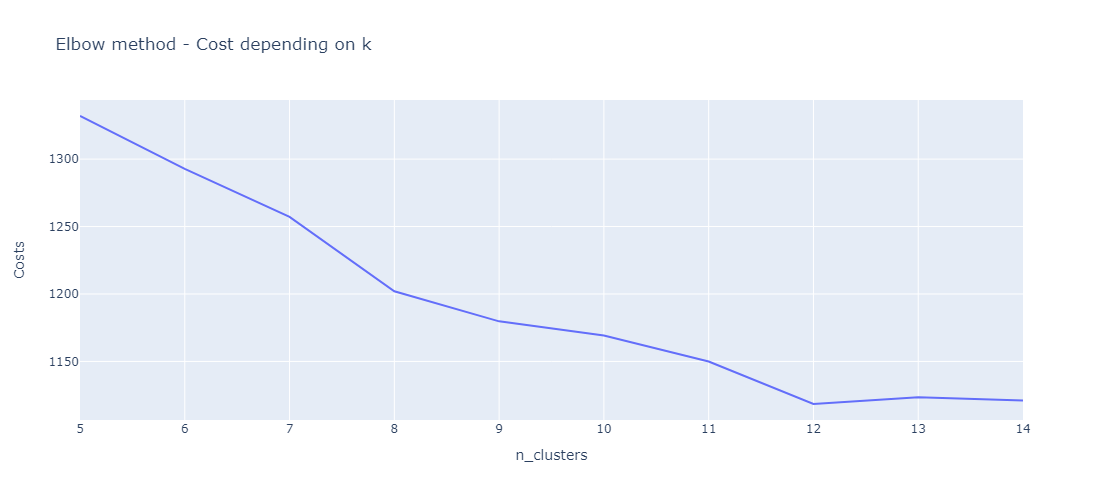

In [305]:
import plotly.express as px

df_cost = pd.DataFrame(list(zip(range(5, 15), costs)), columns=['n_clusters', 'Costs'])
px.line(df_cost, x="n_clusters", y="Costs", 
        title='Elbow method - Cost depending on k',
        width=700, height=500
       ).show()

In [306]:
# Categorical column indices
cat_cols_indices = [0, 1, 2, 3, 6]
# Initialize KPrototypes object
n_clusters=8
kproto = KPrototypes(n_clusters=n_clusters, verbose=2, n_init=1, max_iter=30)
clusters = kproto.fit_predict(df_scaled.values, categorical=cat_cols_indices)
df_ft_final['Cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/30, moves: 24680, ncost: 1217.671916237122
Run: 1, iteration: 2/30, moves: 1698, ncost: 1217.6479243858455
Run: 1, iteration: 3/30, moves: 207, ncost: 1217.6457871541427
Run: 1, iteration: 4/30, moves: 68, ncost: 1217.6457708501696
Run: 1, iteration: 5/30, moves: 15, ncost: 1217.6457701434313
Run: 1, iteration: 6/30, moves: 0, ncost: 1217.6457701434313


In [307]:
df_ft_final.head()

District Ticket Size Buckets             DPD Bucket Financier  \
0   Mumbai           A. 0-1.6L     1-29 days past due       ROI   
1   Mumbai           A. 0-1.6L  120-179 days past due        PB   
2   Mumbai           A. 0-1.6L  180-359 days past due       ROI   
3   Mumbai           A. 0-1.6L    30-59 days past due        PT   
4   Mumbai           A. 0-1.6L  360-539 days past due        PT   

   No of loan outstanding  Outstanding balance dist_code  Cluster  
0                       1               100000       400        2  
1                       1               136515       400        0  
2                       1                65396       400        2  
3                       1                 6793       400        2  
4                       1                46436       400        2

In [308]:
df_ft_final.groupby('Cluster').count()

District  Ticket Size Buckets  DPD Bucket  Financier  \
Cluster                                                         
0           13771                13771       13771      13771   
1            8462                 8462        8462       8462   
2           10514                10514       10514      10514   
3            9544                 9544        9544       9544   
4            6778                 6778        6778       6778   
5            9057                 9057        9057       9057   
6            3942                 3942        3942       3942   
7            7459                 7459        7459       7459   

         No of loan outstanding  Outstanding balance  dist_code  
Cluster                                                          
0                         13771                13771      13771  
1                          8462                 8462       8462  
2                         10514                10514      10514  
3                          9544                 9544       9544  
4                          6778                 6778       6778  
5                          9057                 9057       9057  
6                          3942                 3942       3942  
7                          7459                 7459       7459

In [428]:
cluster0 = df_ft_final[df_ft_final['Cluster']==0]

In [431]:
cluster0['Ticket Size Buckets'].value_counts() ,   cluster0['DPD Bucket'].value_counts()  , cluster0['District'].value_counts()

(Ticket Size Buckets
 A. 0-1.6L              11558
 D. 3.0L-5.0L             602
 E. 5.0L-10.0L            518
 B. 1.6L-2.0L             467
 C. 2.0L-3.0L             214
 F. 10.0L-15.0L           130
 I. 25.0L-50.0L            80
 G. 15.0L-20.0L            77
 H. 20.0L-25.0L            36
 K. 75.0L-1.0Cr            32
 L. 1.0Cr-3.0Cr            30
 J. 50.0L-75.0L            22
 M. >3.0CR and Above        5
 Name: count, dtype: int64,
 DPD Bucket
 0 Days                   6197
 90-119 days past due     2120
 1-29 days past due       1377
 360-539 days past due     887
 720+ days past due        815
 Restructured Loan         709
 180-359 days past due     467
 60-89 days past due       342
 120-179 days past due     338
 540-719 days past due     311
 30-59 days past due       208
 Name: count, dtype: int64,
 District
 Pune               2812
 Solapur            1421
 Nagpur              750
 Ahmednagar          613
 Amravati            574
 Satara              561
 Osmanabad          

### Observations: cluster0
1. Here we can say majority of loan lies between A. 0-1.6L ticket size
2. Majority of loans have 0 Days past due dpd bucket.
3. Districts like Pune , Solapur, Nagpur have maximum occurance.

In [433]:
cluster1 = df_ft_final[df_ft_final['Cluster']==1]
cluster1['Ticket Size Buckets'].value_counts() ,   cluster1['DPD Bucket'].value_counts()  , cluster1['District'].value_counts()

(Ticket Size Buckets
 C. 2.0L-3.0L           3936
 D. 3.0L-5.0L            967
 E. 5.0L-10.0L           877
 A. 0-1.6L               629
 B. 1.6L-2.0L            585
 I. 25.0L-50.0L          341
 F. 10.0L-15.0L          311
 G. 15.0L-20.0L          231
 J. 50.0L-75.0L          184
 H. 20.0L-25.0L          171
 K. 75.0L-1.0Cr          147
 L. 1.0Cr-3.0Cr           73
 M. >3.0CR and Above      10
 Name: count, dtype: int64,
 DPD Bucket
 0 Days                   4794
 180-359 days past due     745
 60-89 days past due       633
 90-119 days past due      542
 540-719 days past due     471
 1-29 days past due        395
 720+ days past due        344
 120-179 days past due     181
 360-539 days past due     144
 30-59 days past due       133
 Restructured Loan          80
 Name: count, dtype: int64,
 District
 Aurangabad         2002
 Pune                629
 Nanded              553
 Jalgaon             514
 Beed                464
 Jalna               420
 Parbhani            382
 Nagpur 

### Observations: cluster1
1. Here we can say majority of loan lies between 2.0L-3.0L ticket size
2. Majority of loans have 0 days past due dpd bucket.
3. Districts like Aurangabad , Pune , Nanded have maximum occurance.

In [435]:
cluster2 = df_ft_final[df_ft_final['Cluster']==2]
cluster2['Ticket Size Buckets'].value_counts() ,   cluster2['DPD Bucket'].value_counts()  , cluster2['District'].value_counts()

(Ticket Size Buckets
 A. 0-1.6L              5772
 D. 3.0L-5.0L           1575
 E. 5.0L-10.0L          1219
 C. 2.0L-3.0L            738
 B. 1.6L-2.0L            649
 F. 10.0L-15.0L          328
 G. 15.0L-20.0L           81
 I. 25.0L-50.0L           48
 H. 20.0L-25.0L           32
 M. >3.0CR and Above      29
 J. 50.0L-75.0L           23
 K. 75.0L-1.0Cr           14
 L. 1.0Cr-3.0Cr            6
 Name: count, dtype: int64,
 DPD Bucket
 360-539 days past due    3484
 180-359 days past due    1247
 90-119 days past due     1236
 60-89 days past due       934
 1-29 days past due        925
 0 Days                    653
 720+ days past due        563
 540-719 days past due     555
 120-179 days past due     423
 30-59 days past due       381
 Restructured Loan         113
 Name: count, dtype: int64,
 District
 Ahmednagar         3313
 Pune                622
 Nashik              569
 Jalgaon             569
 Nagpur              473
 Yavatmal            383
 Buldhana            370
 Amravat

### Observations: cluster2
1. Here we can say majority of loan lies between A. 0-1.6L  ticket size
2. Majority of loans have 0 days past due dpd bucket.
3. Districts like Ahmednagar , Pune , Nashik have maximum occurance.

In [436]:
cluster3 = df_ft_final[df_ft_final['Cluster']==3]
cluster3['Ticket Size Buckets'].value_counts() ,   cluster3['DPD Bucket'].value_counts()  , cluster3['District'].value_counts()

(Ticket Size Buckets
 A. 0-1.6L              4468
 B. 1.6L-2.0L           1295
 D. 3.0L-5.0L           1155
 E. 5.0L-10.0L           917
 F. 10.0L-15.0L          503
 C. 2.0L-3.0L            374
 G. 15.0L-20.0L          273
 H. 20.0L-25.0L          247
 I. 25.0L-50.0L          190
 J. 50.0L-75.0L           52
 K. 75.0L-1.0Cr           34
 L. 1.0Cr-3.0Cr           21
 M. >3.0CR and Above      15
 Name: count, dtype: int64,
 DPD Bucket
 0 Days                   7152
 90-119 days past due      413
 1-29 days past due        384
 180-359 days past due     375
 720+ days past due        360
 360-539 days past due     239
 60-89 days past due       189
 540-719 days past due     162
 Restructured Loan         135
 120-179 days past due      84
 30-59 days past due        51
 Name: count, dtype: int64,
 District
 Kolhapur           2467
 Sangli              786
 Sindhudurg          735
 Pune                509
 Nagpur              435
 Jalgaon             411
 Mumbai Suburban     345
 Thane  

### Observations: cluster3
1. Here we can say majority of loan lies between A. 0-1.6L  ticket size
2. Majority of loans have 0 days past due dpd bucket.
3. Districts like Kolhapur ,Sangli, Sindhudurg have maximum occurance.

In [437]:
cluster4 = df_ft_final[df_ft_final['Cluster']==4]
cluster4['Ticket Size Buckets'].value_counts() ,   cluster4['DPD Bucket'].value_counts()  , cluster4['District'].value_counts()

(Ticket Size Buckets
 C. 2.0L-3.0L      3373
 B. 1.6L-2.0L      1150
 A. 0-1.6L          937
 E. 5.0L-10.0L      523
 D. 3.0L-5.0L       509
 F. 10.0L-15.0L     157
 G. 15.0L-20.0L      67
 I. 25.0L-50.0L      29
 H. 20.0L-25.0L      24
 J. 50.0L-75.0L       5
 K. 75.0L-1.0Cr       3
 L. 1.0Cr-3.0Cr       1
 Name: count, dtype: int64,
 DPD Bucket
 360-539 days past due    2851
 1-29 days past due       1015
 90-119 days past due     1004
 0 Days                    422
 720+ days past due        419
 Restructured Loan         362
 180-359 days past due     259
 540-719 days past due     141
 60-89 days past due       126
 120-179 days past due     111
 30-59 days past due        68
 Name: count, dtype: int64,
 District
 Sangli             1524
 Pune                366
 Nagpur              362
 Jalgaon             318
 Amravati            292
 Kolhapur            291
 Satara              285
 Solapur             284
 Sindhudurg          280
 Wardha              220
 Ratnagiri           2

### Observations: cluster4
1. Here we can say majority of loan lies between C. 2.0L-3.0L  ticket size
2. Majority of loans have 360-539 days past due dpd bucket.
3. Districts like Sangli , Pune , Nagpur have maximum occurance.

In [438]:
cluster5 = df_ft_final[df_ft_final['Cluster']==5]
cluster5['Ticket Size Buckets'].value_counts() ,   cluster5['DPD Bucket'].value_counts()  , cluster5['District'].value_counts()

(Ticket Size Buckets
 B. 1.6L-2.0L           3333
 D. 3.0L-5.0L           1642
 E. 5.0L-10.0L          1289
 C. 2.0L-3.0L           1234
 A. 0-1.6L               499
 F. 10.0L-15.0L          413
 G. 15.0L-20.0L          236
 I. 25.0L-50.0L          162
 H. 20.0L-25.0L          153
 J. 50.0L-75.0L           49
 K. 75.0L-1.0Cr           24
 L. 1.0Cr-3.0Cr           17
 M. >3.0CR and Above       6
 Name: count, dtype: int64,
 DPD Bucket
 720+ days past due       3058
 0 Days                   1142
 180-359 days past due    1133
 90-119 days past due      731
 60-89 days past due       731
 540-719 days past due     712
 1-29 days past due        674
 360-539 days past due     375
 120-179 days past due     175
 30-59 days past due       163
 Restructured Loan         163
 Name: count, dtype: int64,
 District
 Solapur            3617
 Pune                773
 Latur               568
 Osmanabad           529
 Ahmednagar          456
 Nashik              367
 Jalgaon             329
 Nagpur 

### Observations: cluster5
1. Here we can say majority of loan lies between B. 1.6L-2.0L   ticket size
2. Majority of loans have 720+ days past due dpd bucket.
3. Districts like Solapur , Pune , Latur have maximum occurance.

In [439]:
cluster6 = df_ft_final[df_ft_final['Cluster']==6]
cluster6['Ticket Size Buckets'].value_counts() ,   cluster6['DPD Bucket'].value_counts()  , cluster6['District'].value_counts()

(Ticket Size Buckets
 D. 3.0L-5.0L           1542
 A. 0-1.6L              1198
 B. 1.6L-2.0L            647
 E. 5.0L-10.0L           292
 C. 2.0L-3.0L            160
 F. 10.0L-15.0L           48
 G. 15.0L-20.0L           16
 H. 20.0L-25.0L           15
 I. 25.0L-50.0L           14
 L. 1.0Cr-3.0Cr            5
 J. 50.0L-75.0L            3
 M. >3.0CR and Above       1
 K. 75.0L-1.0Cr            1
 Name: count, dtype: int64,
 DPD Bucket
 1-29 days past due       1969
 90-119 days past due      527
 0 Days                    483
 360-539 days past due     349
 720+ days past due        168
 Restructured Loan         160
 180-359 days past due      97
 60-89 days past due        67
 120-179 days past due      48
 540-719 days past due      46
 30-59 days past due        28
 Name: count, dtype: int64,
 District
 Nanded             1264
 Jalna               238
 Parbhani            198
 Aurangabad          174
 Jalgaon             165
 Nagpur              151
 Beed                134
 Ratnagi

### Observations: cluster6
1. Here we can say majority of loan lies between D. 3.0L-5.0L  ticket size
2. Majority of loans have 1-29 days past due dpd bucket.
3. Districts like Nanded , jalna , Parbhani have maximum occurance.

In [440]:
cluster7 = df_ft_final[df_ft_final['Cluster']==7]
cluster7['Ticket Size Buckets'].value_counts() ,   cluster7['DPD Bucket'].value_counts()  , cluster5['District'].value_counts()

(Ticket Size Buckets
 C. 2.0L-3.0L           2388
 B. 1.6L-2.0L           1176
 D. 3.0L-5.0L           1146
 E. 5.0L-10.0L           935
 A. 0-1.6L               870
 F. 10.0L-15.0L          372
 G. 15.0L-20.0L          206
 I. 25.0L-50.0L          142
 H. 20.0L-25.0L          127
 J. 50.0L-75.0L           47
 K. 75.0L-1.0Cr           27
 L. 1.0Cr-3.0Cr           17
 M. >3.0CR and Above       6
 Name: count, dtype: int64,
 DPD Bucket
 0 Days                   5037
 1-29 days past due        509
 90-119 days past due      504
 360-539 days past due     406
 720+ days past due        211
 Restructured Loan         206
 180-359 days past due     183
 60-89 days past due       164
 540-719 days past due     106
 120-179 days past due      81
 30-59 days past due        52
 Name: count, dtype: int64,
 District
 Solapur            3617
 Pune                773
 Latur               568
 Osmanabad           529
 Ahmednagar          456
 Nashik              367
 Jalgaon             329
 Nagpur 

### Observations: cluster7
1. Here we can say majority of loan lies between C. 2.0L-3.0L  ticket size
2. Majority of loans have 0 Days past due dpd bucket.
3. Districts like solapur , pune , latur have maximum occurance.